# Week 2 - Visualizations

By Group XX:

-   Aleksandar Lukic - s194066
-   Paula Barho - s242926
-   Victor Gustav Harbo Rasmussen - s204475

As explained in in class during Lecture 1, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

## Overview

Today's lecture does a few things.
* First there is an introduction to data visualization incl a little exercise and a video (Part 1). 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots (Part 2,4,5).
* We will also talk a bit about what makes a good plot (Part 3).

## Part 1: A little visualization exercise

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

Now, to the exercise:

In [129]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import stats

In [130]:
# Set pandas display options to show all columns for .head command
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Auto-detect the display width
pd.set_option('display.max_colwidth', None) # Show full content of each column

In [131]:
# Get path of data directory
files_path = os.path.abspath(os.path.join(os.pardir, "files"))
files_path

'c:\\Users\\Aleksandar\\School\\02806_Social_Data\\files'

In [132]:
# Get path of plot directory
plots_path = os.path.abspath(os.path.join(os.pardir, "plots"))
plots_path

'c:\\Users\\Aleksandar\\School\\02806_Social_Data\\plots'

In [133]:
# Create paths to the datasets
data_1_path = os.path.join(files_path, "data1.tsv")
data_2_path = os.path.join(files_path, "data2.tsv")
data_3_path = os.path.join(files_path, "data3.tsv")
data_4_path = os.path.join(files_path, "data4.tsv") 

# Load the datasets from the files folder
df_1 = pd.read_csv(data_1_path, sep='\t', header=None)
df_2 = pd.read_csv(data_2_path, sep='\t', header=None)
df_3 = pd.read_csv(data_3_path, sep='\t', header=None)
df_4 = pd.read_csv(data_4_path, sep='\t', header=None)

In [134]:
# Define the X and Y columns for each dataset
X1 = df_1.iloc[:, 0]
Y1 = df_1.iloc[:, 1]
X2 = df_2.iloc[:, 0]
Y2 = df_2.iloc[:, 1]
X3 = df_3.iloc[:, 0]
Y3 = df_3.iloc[:, 1]
X4 = df_4.iloc[:, 0]
Y4 = df_4.iloc[:, 1]

> *Exercise*: 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. <font color='grey'>You may also ask an LLM about the string formatting, but make sure it doesn't just give you the answer: Ask how string formatting works, get some examples, and solve your own problem based on that.</font>

In [135]:
# Calculate the mean values for each dataset
mean_x_1 = np.mean(X1)
mean_y_1 = np.mean(Y1)
mean_x_2 = np.mean(X2)
mean_y_2 = np.mean(Y2)
mean_x_3 = np.mean(X3)
mean_y_3 = np.mean(Y3)
mean_x_4 = np.mean(X4)
mean_y_4 = np.mean(Y4)

In [136]:
# Formating the mean values to 2 decimal places
means = [mean_x_1, mean_y_1, mean_x_2, mean_y_2, mean_x_3, mean_y_3, mean_x_4, mean_y_4]
names = ["x_1", "y_1", "x_2", "y_2", "x_3", "y_3", "x_4", "y_4"]
means_rounded = ['%.2f' % mu for mu in means]

# Formating with column names and mean values
res = zip(names, means_rounded)
print("MEANS")
print(*res, sep = "\n")

MEANS
('x_1', '9.00')
('y_1', '7.50')
('x_2', '9.00')
('y_2', '7.50')
('x_3', '9.00')
('y_3', '7.50')
('x_4', '9.00')
('y_4', '7.50')


> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. <font color='grey'>You should be able to do this without any help from LLMs.</font> Print it to three decimal places.

In [137]:
# Calculate the variances for each dataset
var_x_1 = np.var(X1)
var_y_1 = np.var(Y1)
var_x_2 = np.var(X2)
var_y_2 = np.var(Y2)
var_x_3 = np.var(X3)
var_y_3 = np.var(Y3)
var_x_4 = np.var(X4)
var_y_4 = np.var(Y4)

In [138]:
# Formating the variances to 2 decimal places
vars = [var_x_1, var_y_1, var_x_2, var_y_2, var_x_3, var_y_3, var_x_4, var_y_4]
names = ["x_1", "y_1", "x_2", "y_2", "x_3", "y_3", "x_4", "y_4"]
vars_rounded = ['%.3f' % sigma for sigma in vars]

# Formating with column names and mean values
res = zip(names, vars_rounded)
print("VARIANCES")
print(*res, sep = "\n")

VARIANCES
('x_1', '10.000')
('y_1', '3.752')
('x_2', '10.000')
('y_2', '3.752')
('x_3', '10.000')
('y_3', '3.748')
('x_4', '10.000')
('y_4', '3.748')


> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).

In [139]:
# Calculate the Pearson correlation coefficient for each dataset
corr_1 = np.corrcoef(X1, Y1)[0][1]
corr_2 = np.corrcoef(X2, Y2)[0][1]
corr_3 = np.corrcoef(X3, Y3)[0][1]
corr_4 = np.corrcoef(X4, Y4)[0][1]

In [140]:
# Formating the correlation coefficients to 3 decimal places
corrs = [corr_1, corr_2, corr_3, corr_4]
corrs_rounded = ['%.3f' % corr for corr in corrs]

# Formating with column names and mean values
res = zip(
    ["X1", "X2", "X3", "X4"], 
    ["Y1", "Y2", "Y3", "Y4"], 
    vars_rounded
)
print("PEARSON CORRELATION COEFFICIENTS")
print(*res, sep = "\n")

PEARSON CORRELATION COEFFICIENTS
('X1', 'Y1', '10.000')
('X2', 'Y2', '3.752')
('X3', 'Y3', '10.000')
('X4', 'Y4', '3.752')


> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> a, b, r_value, p_value, std_err = stats.linregress(x,y)
>```

In [141]:
# Helper function to print the linear regression results
def compute_linear_regression(X, Y):
    a, b, r_value, p_value, std_err = stats.linregress(X, Y)
    print("a: ", '%.3f' % a)
    print("b: ", '%.3f' % b)
    print("R-squared: ", '%.3f' % r_value**2)
    print("P-value: ", '%.3f' % p_value)
    print("Standard error: ", '%.3f' % std_err)
    print("\n")
    return a, b, r_value, p_value, std_err

In [142]:
a_1, b_1, r_value_1, p_value_1, std_err_1 = compute_linear_regression(X1, Y1)
a_2, b_2, r_value_2, p_value_2, std_err_2 = compute_linear_regression(X2, Y2)
a_3, b_3, r_value_3, p_value_3, std_err_3 = compute_linear_regression(X3, Y3)
a_4, b_4, r_value_4, p_value_4, std_err_4 = compute_linear_regression(X4, Y4)

a:  0.500
b:  3.000
R-squared:  0.667
P-value:  0.002
Standard error:  0.118


a:  0.500
b:  3.001
R-squared:  0.666
P-value:  0.002
Standard error:  0.118


a:  0.500
b:  3.002
R-squared:  0.666
P-value:  0.002
Standard error:  0.118


a:  0.500
b:  3.002
R-squared:  0.667
P-value:  0.002
Standard error:  0.118




> * Comment on the results from the previous steps. What do you observe? 

It would seem so far, that the four datasets share very similar statistical properties. This could suggest that the dataset are identical or very similar in their datapoints.

> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/anscombe.png).) <font color='grey'>For this sub-exercise, try to write the code based on the example I link to. If you get stuck, you may use your LLM to figure it out. But don't ask it for the solution, ask for help with figuring out how to use the functions!</font>

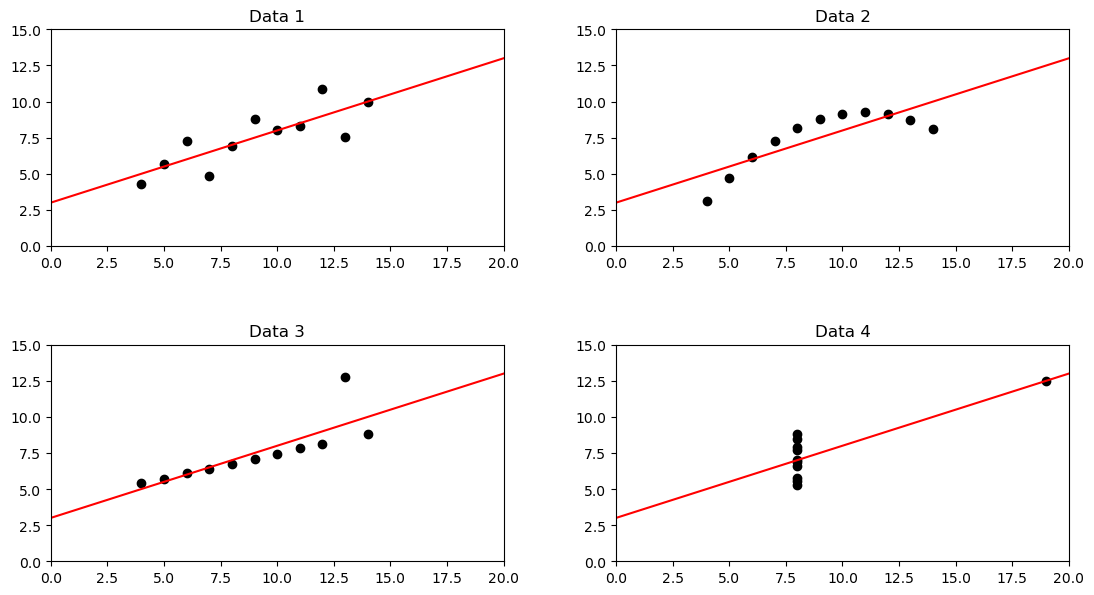

In [143]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 7))
fig.tight_layout(pad = 5.0)  # Increase padding to avoid overlap

# Set the same ranges of x- and y-axis for all subplots
xlim = (0, 20)
ylim = (0, 15)
plt.setp(axs, xlim=xlim, ylim=ylim)

# Plot the data points for each dataset
axs[0, 0].scatter(X1, Y1, color='black', label='Data 1')
axs[0, 0].set_title('Data 1')
axs[0, 1].scatter(X2, Y2, color='black', label='Data 2')
axs[0, 1].set_title('Data 2')
axs[1, 0].scatter(X3, Y3, color='black', label='Data 3')
axs[1, 0].set_title('Data 3')
axs[1, 1].scatter(X4, Y4, color='black', label='Data 4')
axs[1, 1].set_title('Data 4')

# Plot the linear regression lines
x = np.array(xlim)

def fx(x, a, b):
    return a*x + b

axs[0, 0].plot(x, fx(x, a_1, b_1), color='red')
axs[0, 1].plot(x, fx(x, a_2, b_2), color='red')
axs[1, 0].plot(x, fx(x, a_3, b_3), color='red')
axs[1, 1].plot(x, fx(x, a_4, b_4), color='red')

plt.savefig(os.path.join(plots_path, "W2_ex1_scatterplot.pdf"), format="pdf", bbox_inches="tight")
plt.show()

> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this). <font color='grey'>Again, try to write down your own thoughts first. Then you can ask your LLM for help after that</font>.

As shown in the plots, the regression for all of the dataset are almost identical. However, this is simply a very intricate coinsidence, as the points are placed in a way which make the linear regression limited in its effectivness. These exact datasets are what makes up [_Anscombe's quartet_](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). 

> * <font color='grey'>What did you get out of asking the LLM about the previous sub-question? How did you even go about asking the LLM about the point of the entire set of questions? Reflect on whether or not the LLM helped you get smarter?</font>

We did not use any LLM for this exercise. Simply using google and reading the documentation was enough.

> *Excercise:* Questions for this [YouTube Lecture](https://www.youtube.com/watch?v=9D2aI30AMhM&ab_channel=SuneLehmann). 
> 
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?

In the context of data for statistical data analysis, _Data_ are the measurements, numbers, text, etc. which we use to explain stuff. _Metadata_ is the contextual information about the data we are using.

_**Data**_: The longitude and latitude decimal values measured on a bike trip.

_**Metadata**_: The variables names and comments in the dataset file, which helps us understand what the values represent, e.g. `lon=123.456, lat=123.456`

> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 

Sune explains how our eyes collect the information in front of us, and then how we percieve it. He highlights the eye's capibility of seeing the bigger picture, whereas simple statistics might fail. This is clearly demonstrated in the previous execise in this notebook with the Anscombe's quartet. 

In Sune's example, 1 vs 1000 can be presented visually in different way to convey the meaning. The magnitude of difference between data points can be hard to grasp conceptually, but if we manage to present it more visually aggresively, it can transmit the underlying information more clearly, e.g. the dots and the lines from Sune's examples. 

> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

The _Simpson's Paradox_ explains how aggregated data may show misleading trends, while its underlying sub-classifications may show more accurately described isolated trends.  

> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis.

**Exploratory Data Analysis** is when we are looking to test or explore a hypothesis or looking for mmeaning within a dataset.

**Explanatory Data Analysis** is when we are aware of trends within a dataset and want to convey this information to others.

## Part 2: Visualizing patterns in the data

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

In [144]:
focuscrimes = set([
    'ASSAULT',
    'BURGLARY',
    'DRUG/NARCOTIC',
    'DRUNKENNESS',
    'LARCENY/THEFT',
    'PROSTITUTION',
    'ROBBERY',
    'STOLEN PROPERTY',
    'TRESPASS',
    'VANDALISM',
    'VEHICLE THEFT',
    'WEAPON LAWS',
])

> *Exercise*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> **Note:** restrict yourself to the dataset of *entire years*.
>

In [145]:
# Read crime data from the CSV file
data_path = os.path.abspath(os.path.join(os.pardir, "data"))
csv_name = "Police_Department_Incident_Reports_Complete.csv"
df = pd.read_csv(os.path.join(data_path, csv_name))
df.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,MonthName,Year
0,VANDALISM,NORTHERN,-122.428505,37.779534,Thursday,0,1,1,January,2004
1,VANDALISM,RICHMOND,-122.462415,37.783951,Thursday,0,1,1,January,2004
2,LARCENY/THEFT,BAYVIEW,-122.402541,37.728700,Thursday,0,1,1,January,2004
3,NON-CRIMINAL,SOUTHERN,-122.403405,37.775421,Thursday,0,1,1,January,2004
4,NON-CRIMINAL,RICHMOND,-122.477371,37.783277,Thursday,0,1,1,January,2004


In [146]:
# Extract only the rows where the "Category" is in the focus_crimes list'
df_focus = df[df['Category'].isin(focuscrimes)]
df_focus.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,MonthName,Year
0,VANDALISM,NORTHERN,-122.428505,37.779534,Thursday,0,1,1,January,2004
1,VANDALISM,RICHMOND,-122.462415,37.783951,Thursday,0,1,1,January,2004
2,LARCENY/THEFT,BAYVIEW,-122.402541,37.728700,Thursday,0,1,1,January,2004
6,LARCENY/THEFT,CENTRAL,-122.395330,37.796665,Thursday,0,1,1,January,2004
7,ASSAULT,INGLESIDE,-122.417145,37.712150,Thursday,0,1,1,January,2004


> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?

In [147]:
# Make dictonary of abbreviations for the days of the week
days_long = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_abrv = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']

days = dict(zip(days_long, days_abrv))
print("DICTONARY OF ABBREVIATIONS\nFOR THE DAYS OF THE WEEK")
for d in days:
    print([d, days[d]], sep="\n")

# Group by category and day of the week, then count occurrences
day_groupings = df_focus.groupby(['Category', 'Day of Week']).size().unstack().reindex(columns = days_long)
day_groupings

DICTONARY OF ABBREVIATIONS
FOR THE DAYS OF THE WEEK
['Monday', 'MON']
['Tuesday', 'TUE']
['Wednesday', 'WED']
['Thursday', 'THU']
['Friday', 'FRI']
['Saturday', 'SAT']
['Sunday', 'SUN']


Day of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Category,,,,,,,
ASSAULT,28586,28165,28475,28103,30804,32854,32267
BURGLARY,19010,19118,19818,19491,22190,17846,16782
DRUG/NARCOTIC,18013,21092,23422,20623,17955,15335,14461
DRUNKENNESS,1120,1025,1097,1068,1330,1737,1781
LARCENY/THEFT,96617,95979,99789,99194,111269,109153,98545
PROSTITUTION,1111,2671,2942,3369,2538,1689,1124
ROBBERY,10064,9861,9933,9823,10218,10718,10347
STOLEN PROPERTY,2140,2194,2378,2148,2129,2000,1908
TRESPASS,5331,5582,5617,5291,5376,4721,4545


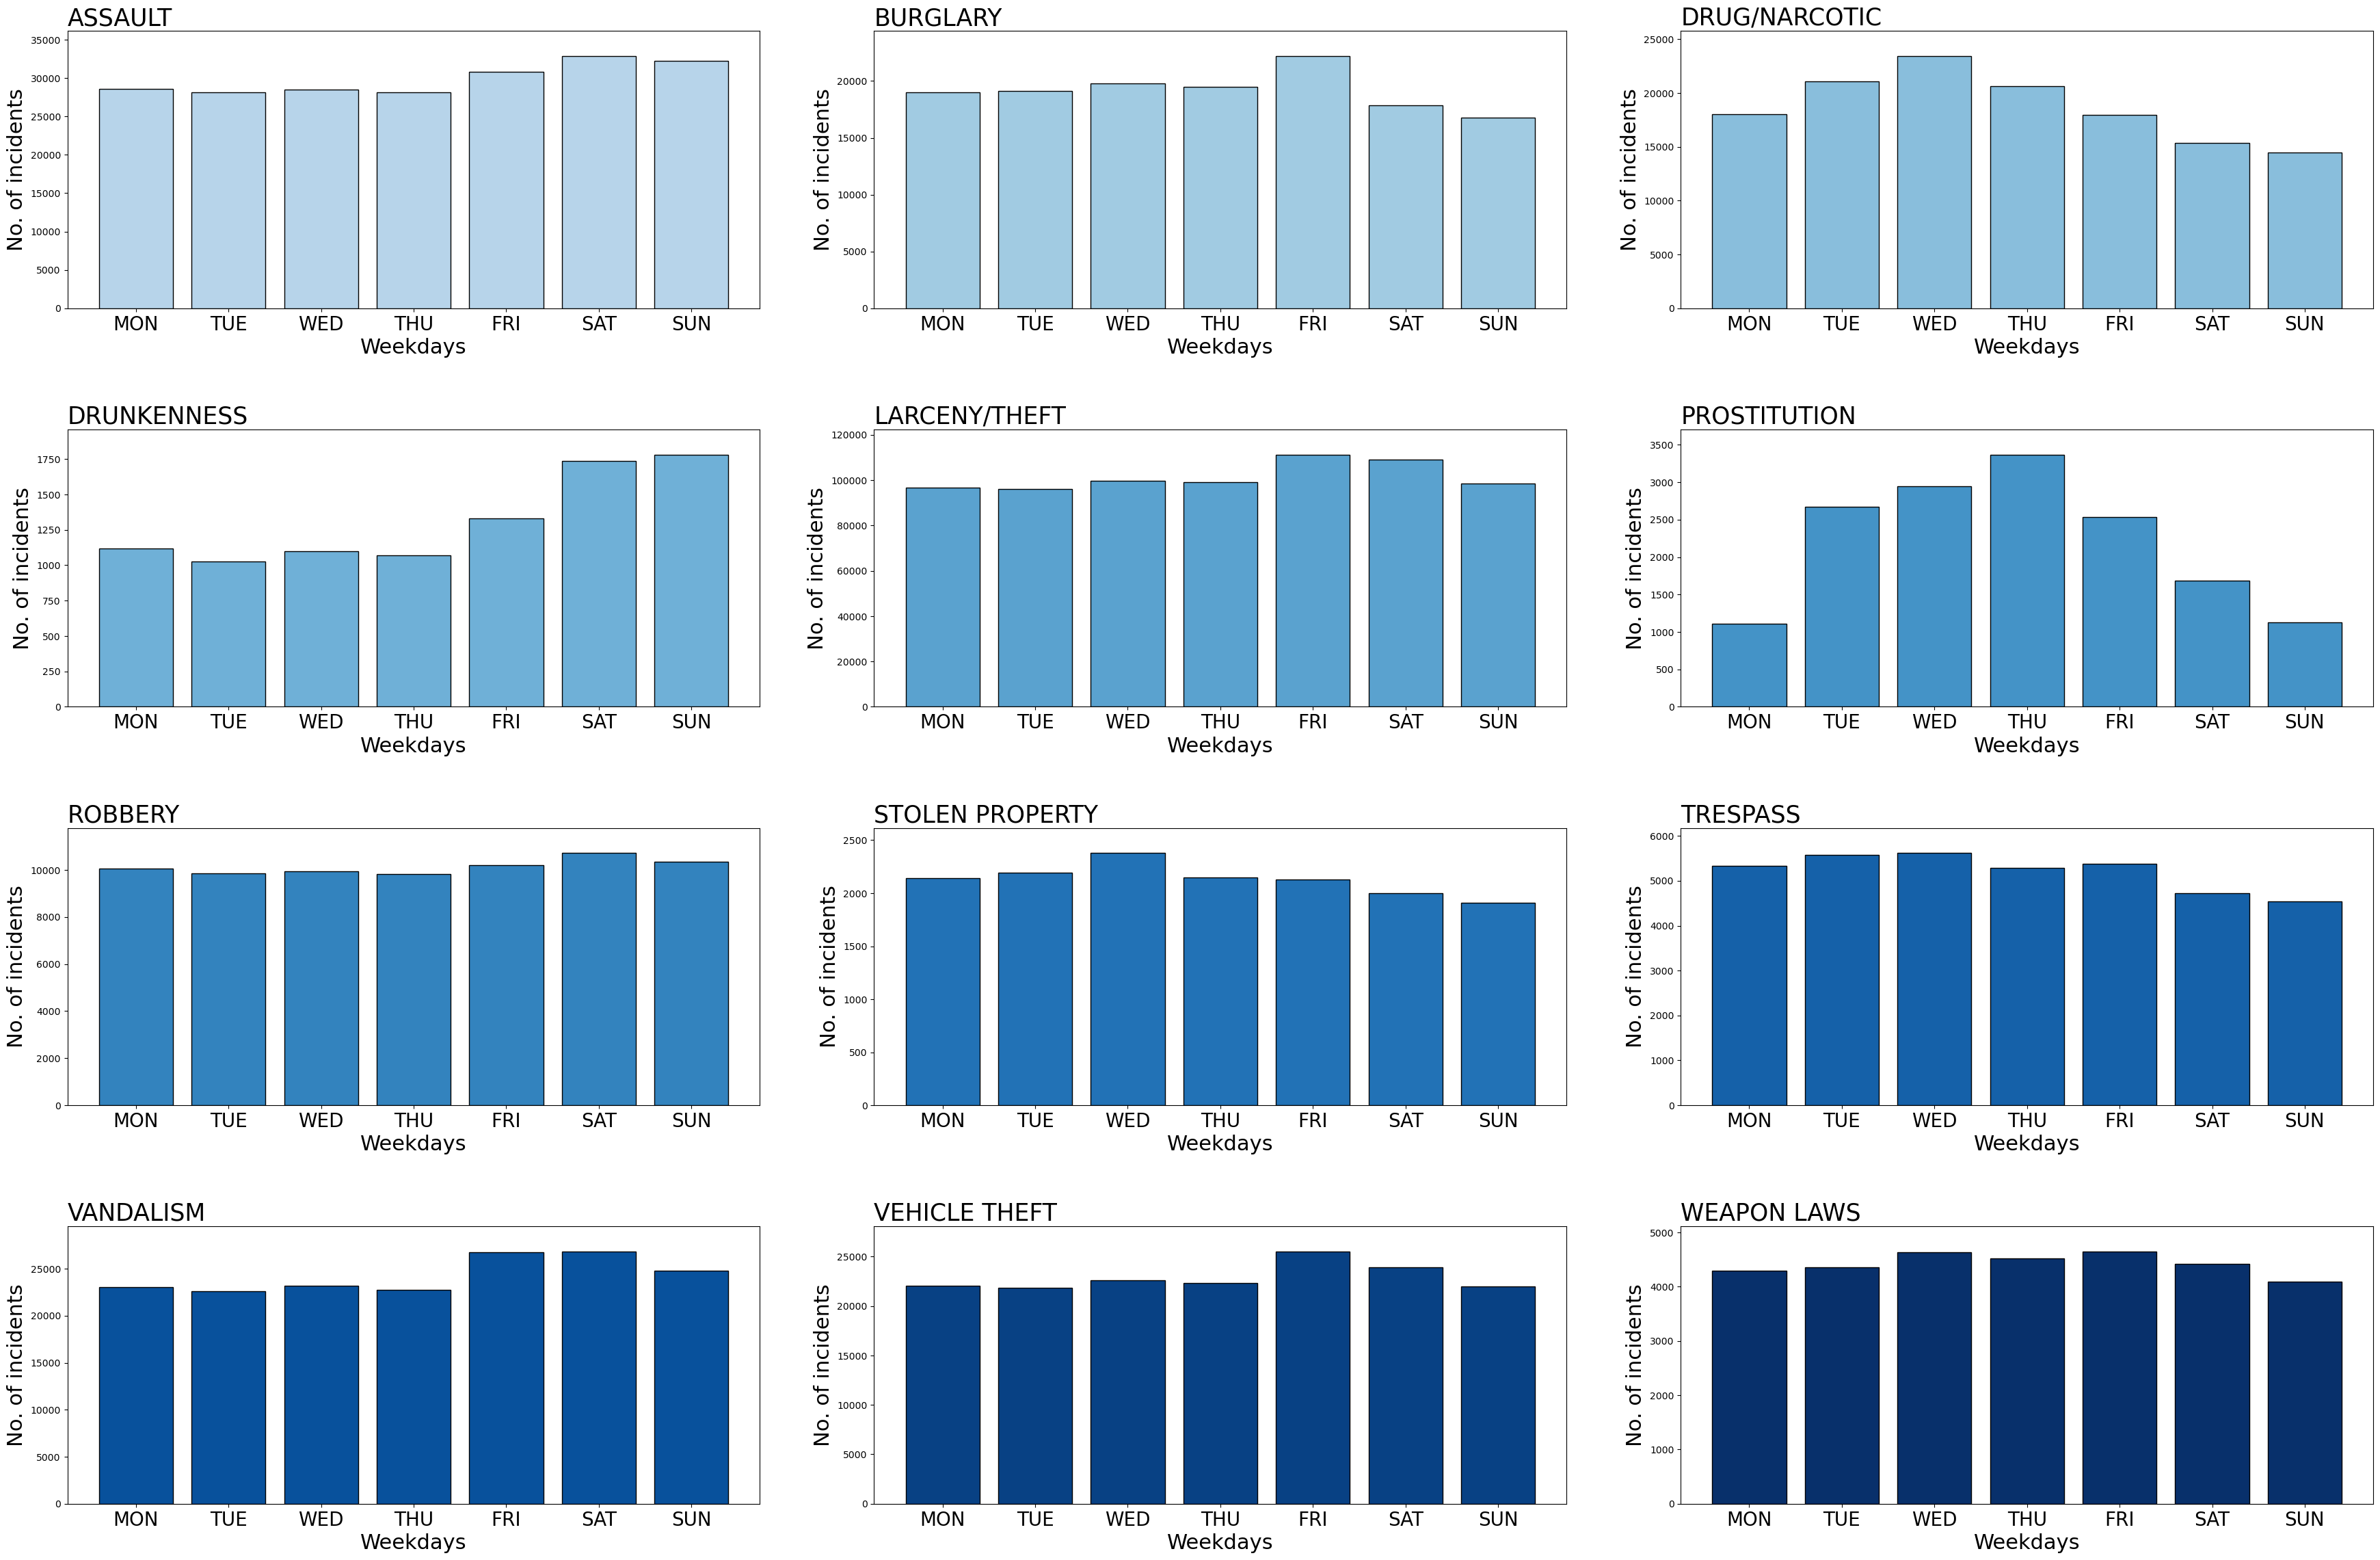

In [148]:
# Create a grid of subplots based on number of focus crimes

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 20
label_fontsize = 22

# Colors shades
colors = plt.cm.Blues(np.linspace(0.3, 1, len(focuscrimes)))

# Dimensions of the grid
no_cols = 3
no_rows = int(len(focuscrimes)/no_cols)
col_size = 12
row_size = 6

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        col_size*no_cols,  # Hardcoded width of 8 inches per column 
        row_size*no_rows   # Hardcoded height of 4 inches per row
    ), 
    sharex=False
)

# Flatten for easier indexing
axs = axs.flatten()

# Find the maximum value for the y-axis
max_val = day_groupings.max().max()

# PLOTTING THE DATA
for i, (category, count) in enumerate(day_groupings.iterrows()):
    axs[i].bar(days_abrv, count, color=colors[i], edgecolor='black')
    axs[i].set_ylim(
        # count.min()*0.9, # Uncomment to show the min to max span
        0, 
        # max_val*1.1, # Uncomment to show set the same y-axis for all plots
        count.max()*1.1,
    )
    
    axs[i].set_title(category, loc='left', fontsize = subtitle_fontsize)
    axs[i].set_xticks(days_abrv)
    axs[i].tick_params(axis='x', labelsize = tick_fontsize)
    axs[i].set_ylabel('No. of incidents', fontsize = label_fontsize)
    axs[i].set_xlabel('Weekdays', fontsize = label_fontsize)

fig.tight_layout(pad = 5.0)
plt.savefig(os.path.join(plots_path, "W2_ex2_catperday.pdf"), format="pdf", bbox_inches="tight")
plt.show()

> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

In [149]:
# Make dictonary of abbreviations for the days of the week
months_long = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_abrv = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

months = dict(zip(months_long, months_abrv))
print("DICTONARY OF ABBREVIATIONS\nFOR THE MONTHS OF THE YEAR")
for m in months:
    print([m, months[m]], sep="\n")

# Group by category and months, then count occurrences
month_groupings = df_focus.groupby(['Category', 'MonthName']).size().unstack().reindex(columns = months_long)
month_groupings

DICTONARY OF ABBREVIATIONS
FOR THE MONTHS OF THE YEAR
['January', 'JAN']
['February', 'FEB']
['March', 'MAR']
['April', 'APR']
['May', 'MAY']
['June', 'JUN']
['July', 'JUL']
['August', 'AUG']
['September', 'SEP']
['October', 'OCT']
['November', 'NOV']
['December', 'DEC']


MonthName,January,February,March,April,May,June,July,August,September,October,November,December
Category,,,,,,,,,,,,
ASSAULT,16992,15981,17943,17331,17833,17483,17625,17960,18566,18698,16640,16202
BURGLARY,11675,10131,11158,11061,11583,10761,11996,11528,10928,10954,10884,11596
DRUG/NARCOTIC,12031,11552,12176,10657,10891,9699,10656,11441,10779,11214,10435,9370
DRUNKENNESS,759,691,786,735,820,743,737,837,778,856,698,718
LARCENY/THEFT,59651,52938,56863,54880,57725,58536,63027,63866,60952,63588,58741,59779
PROSTITUTION,1529,1401,1273,1352,1259,1122,1155,1252,1450,1227,1246,1178
ROBBERY,5959,5505,5595,5632,5902,6032,6071,6383,5888,6327,5846,5824
STOLEN PROPERTY,1382,1169,1294,1216,1240,1169,1226,1314,1270,1291,1142,1184
TRESPASS,3161,2757,3142,3071,3200,2963,3055,3196,3141,3065,2911,2801


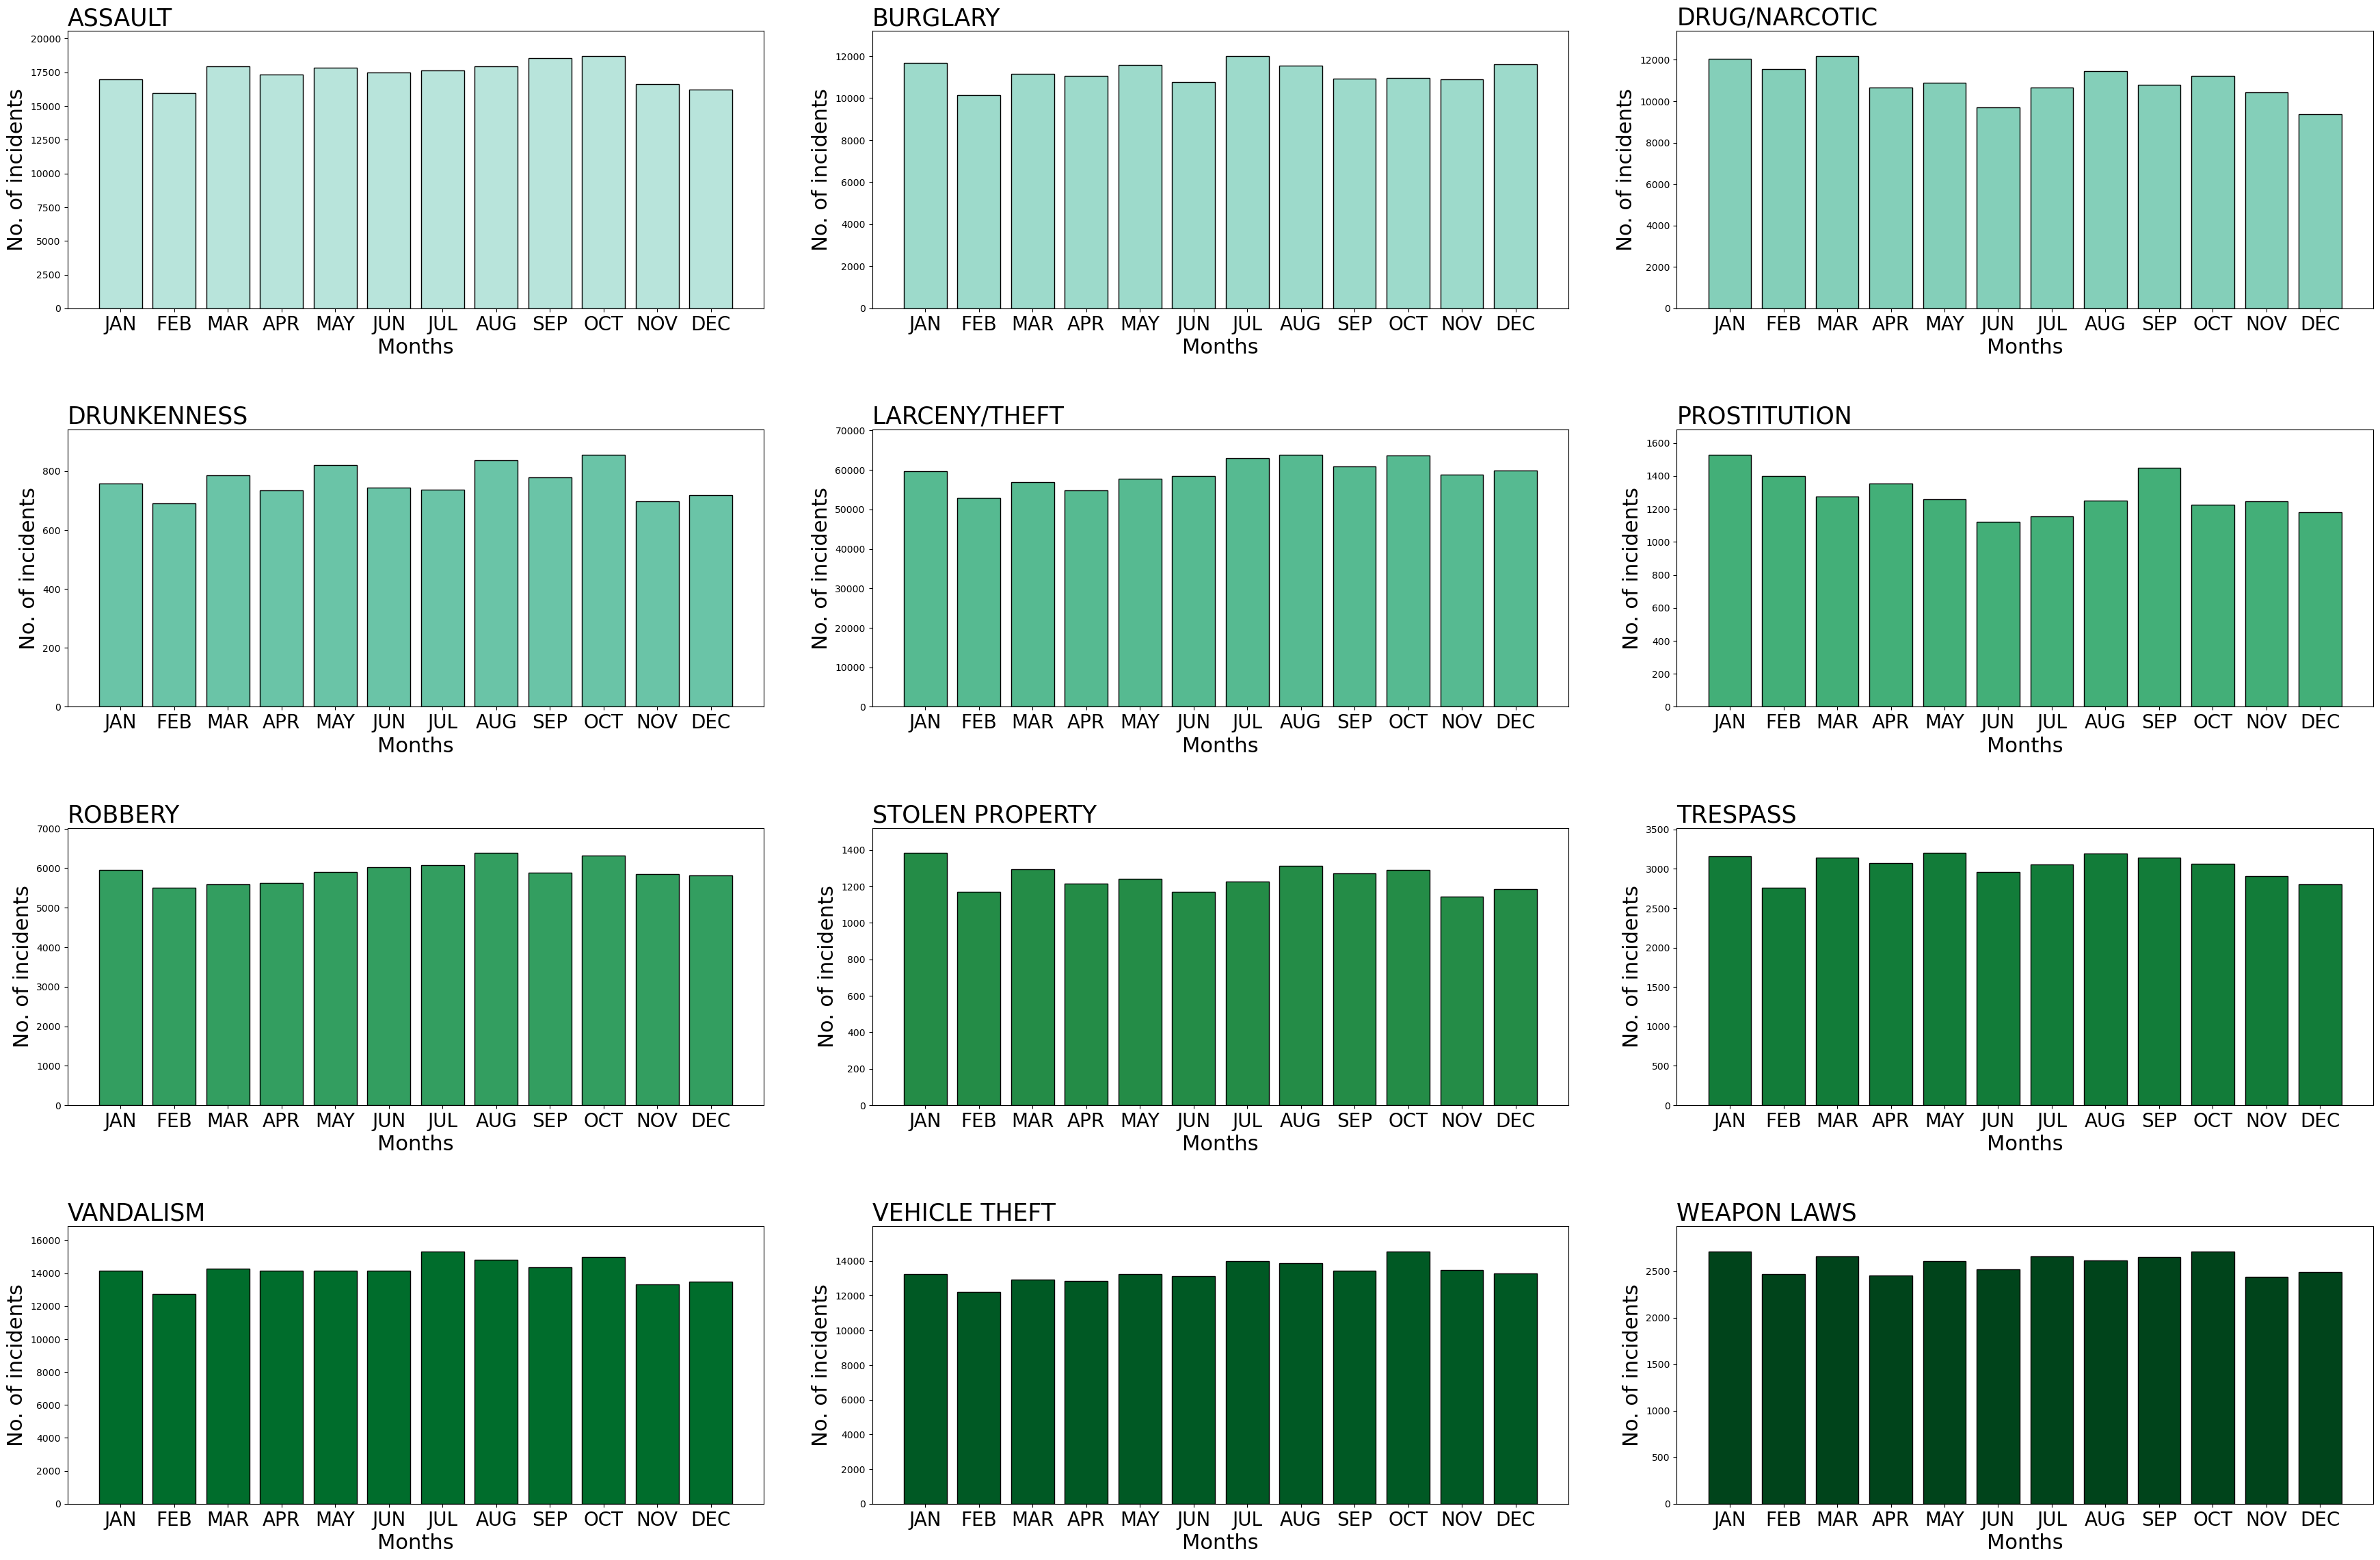

In [150]:
# Create a grid of subplots based on number of focus crimes

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 20
label_fontsize = 22

# Colors shades
colors = plt.cm.BuGn(np.linspace(0.3, 1, len(focuscrimes)))

# Dimensions of the grid
no_cols = 3
no_rows = int(len(focuscrimes)/no_cols)

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        12*no_cols,  # Hardcoded width of 8 inches per column 
        6*no_rows   # Hardcoded height of 4 inches per row
    ), 
    sharex=False
)

# Flatten for easier indexing
axs = axs.flatten()

# Find the maximum value for the y-axis
max_val = month_groupings.max().max()

# PLOTTING THE DATA
for i, (category, count) in enumerate(month_groupings.iterrows()):
    axs[i].bar(months_abrv, count, color=colors[i], edgecolor='black')
    axs[i].set_ylim(
        # count.min()*0.9, # Uncomment to show the min to max span
        0, 
        # max_val*1.1, # Uncomment to show set the same y-axis for all plots
        count.max()*1.1,
    )
    axs[i].set_title(category, loc='left', fontsize = subtitle_fontsize)
    axs[i].set_xticks(months_abrv)
    axs[i].tick_params(axis='x', labelsize = tick_fontsize)
    axs[i].set_ylabel('No. of incidents', fontsize = label_fontsize)
    axs[i].set_xlabel('Months', fontsize = label_fontsize)

fig.tight_layout(pad = 5.0)
plt.savefig(os.path.join(plots_path, "W2_ex2_catpermonth.pdf"), format="pdf", bbox_inches="tight")
plt.show()

> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 

In [151]:
# Make dictonary of abbreviations for the days of the week
hours_long = list(range(24))
hours_abrv = [f"{h:02d}" for h in hours_long]

hours = dict(zip(hours_long, hours_abrv))
print("DICTONARY OF ABBREVIATIONS\nFOR THE HOURS OF THE DAY")
for h in hours:
    print([h, hours[h]], sep="\n")

# Group by category and months, then count occurrences
hour_groupings = df_focus.groupby(['Category', 'Hour']).size().unstack().reindex(columns = hours_long)
hour_groupings

DICTONARY OF ABBREVIATIONS
FOR THE HOURS OF THE DAY
[0, '00']
[1, '01']
[2, '02']
[3, '03']
[4, '04']
[5, '05']
[6, '06']
[7, '07']
[8, '08']
[9, '09']
[10, '10']
[11, '11']
[12, '12']
[13, '13']
[14, '14']
[15, '15']
[16, '16']
[17, '17']
[18, '18']
[19, '19']
[20, '20']
[21, '21']
[22, '22']
[23, '23']


Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Category,,,,,,,,,,,,,,,,,,,,,,,,
ASSAULT,11093,10054,8870,4437,2990,2514,3208,4763,6887,7799,8552,9387,11277,10209,10342,11449,11464,11199,11121,10657,10411,10679,10126,9766
BURGLARY,6250,4146,4969,5682,5471,4383,3366,4015,5853,5206,5155,4766,6718,4324,4928,5710,6607,8656,8385,6582,6103,5784,5801,5395
DRUG/NARCOTIC,3993,2425,1999,1383,979,568,1634,3563,4480,5093,5721,6593,7315,9312,10135,9667,9855,9625,8277,6904,5326,5101,5924,5029
DRUNKENNESS,758,737,624,247,122,44,76,153,136,161,181,271,272,270,312,353,423,486,535,505,543,572,698,679
LARCENY/THEFT,30605,17310,11536,8139,5799,5673,8063,11688,19688,23786,31064,35757,43931,37470,37823,39653,40940,47255,55197,51696,45630,37234,34461,30148
PROSTITUTION,1418,1090,799,548,468,506,455,240,144,152,187,207,486,305,304,252,303,520,893,1166,906,1049,1429,1617
ROBBERY,3592,3711,3715,2247,1506,1347,1259,1188,1414,1725,2045,2381,2707,2913,3082,3409,3725,3686,3764,3916,4239,4717,4485,4191
STOLEN PROPERTY,727,475,423,324,297,236,288,400,489,525,596,656,936,821,846,867,959,914,855,754,663,615,623,608
TRESPASS,2205,809,878,650,547,809,1474,1672,2084,1900,1871,1851,2508,1947,1772,1894,1783,1772,1622,1420,1413,1318,1179,1085


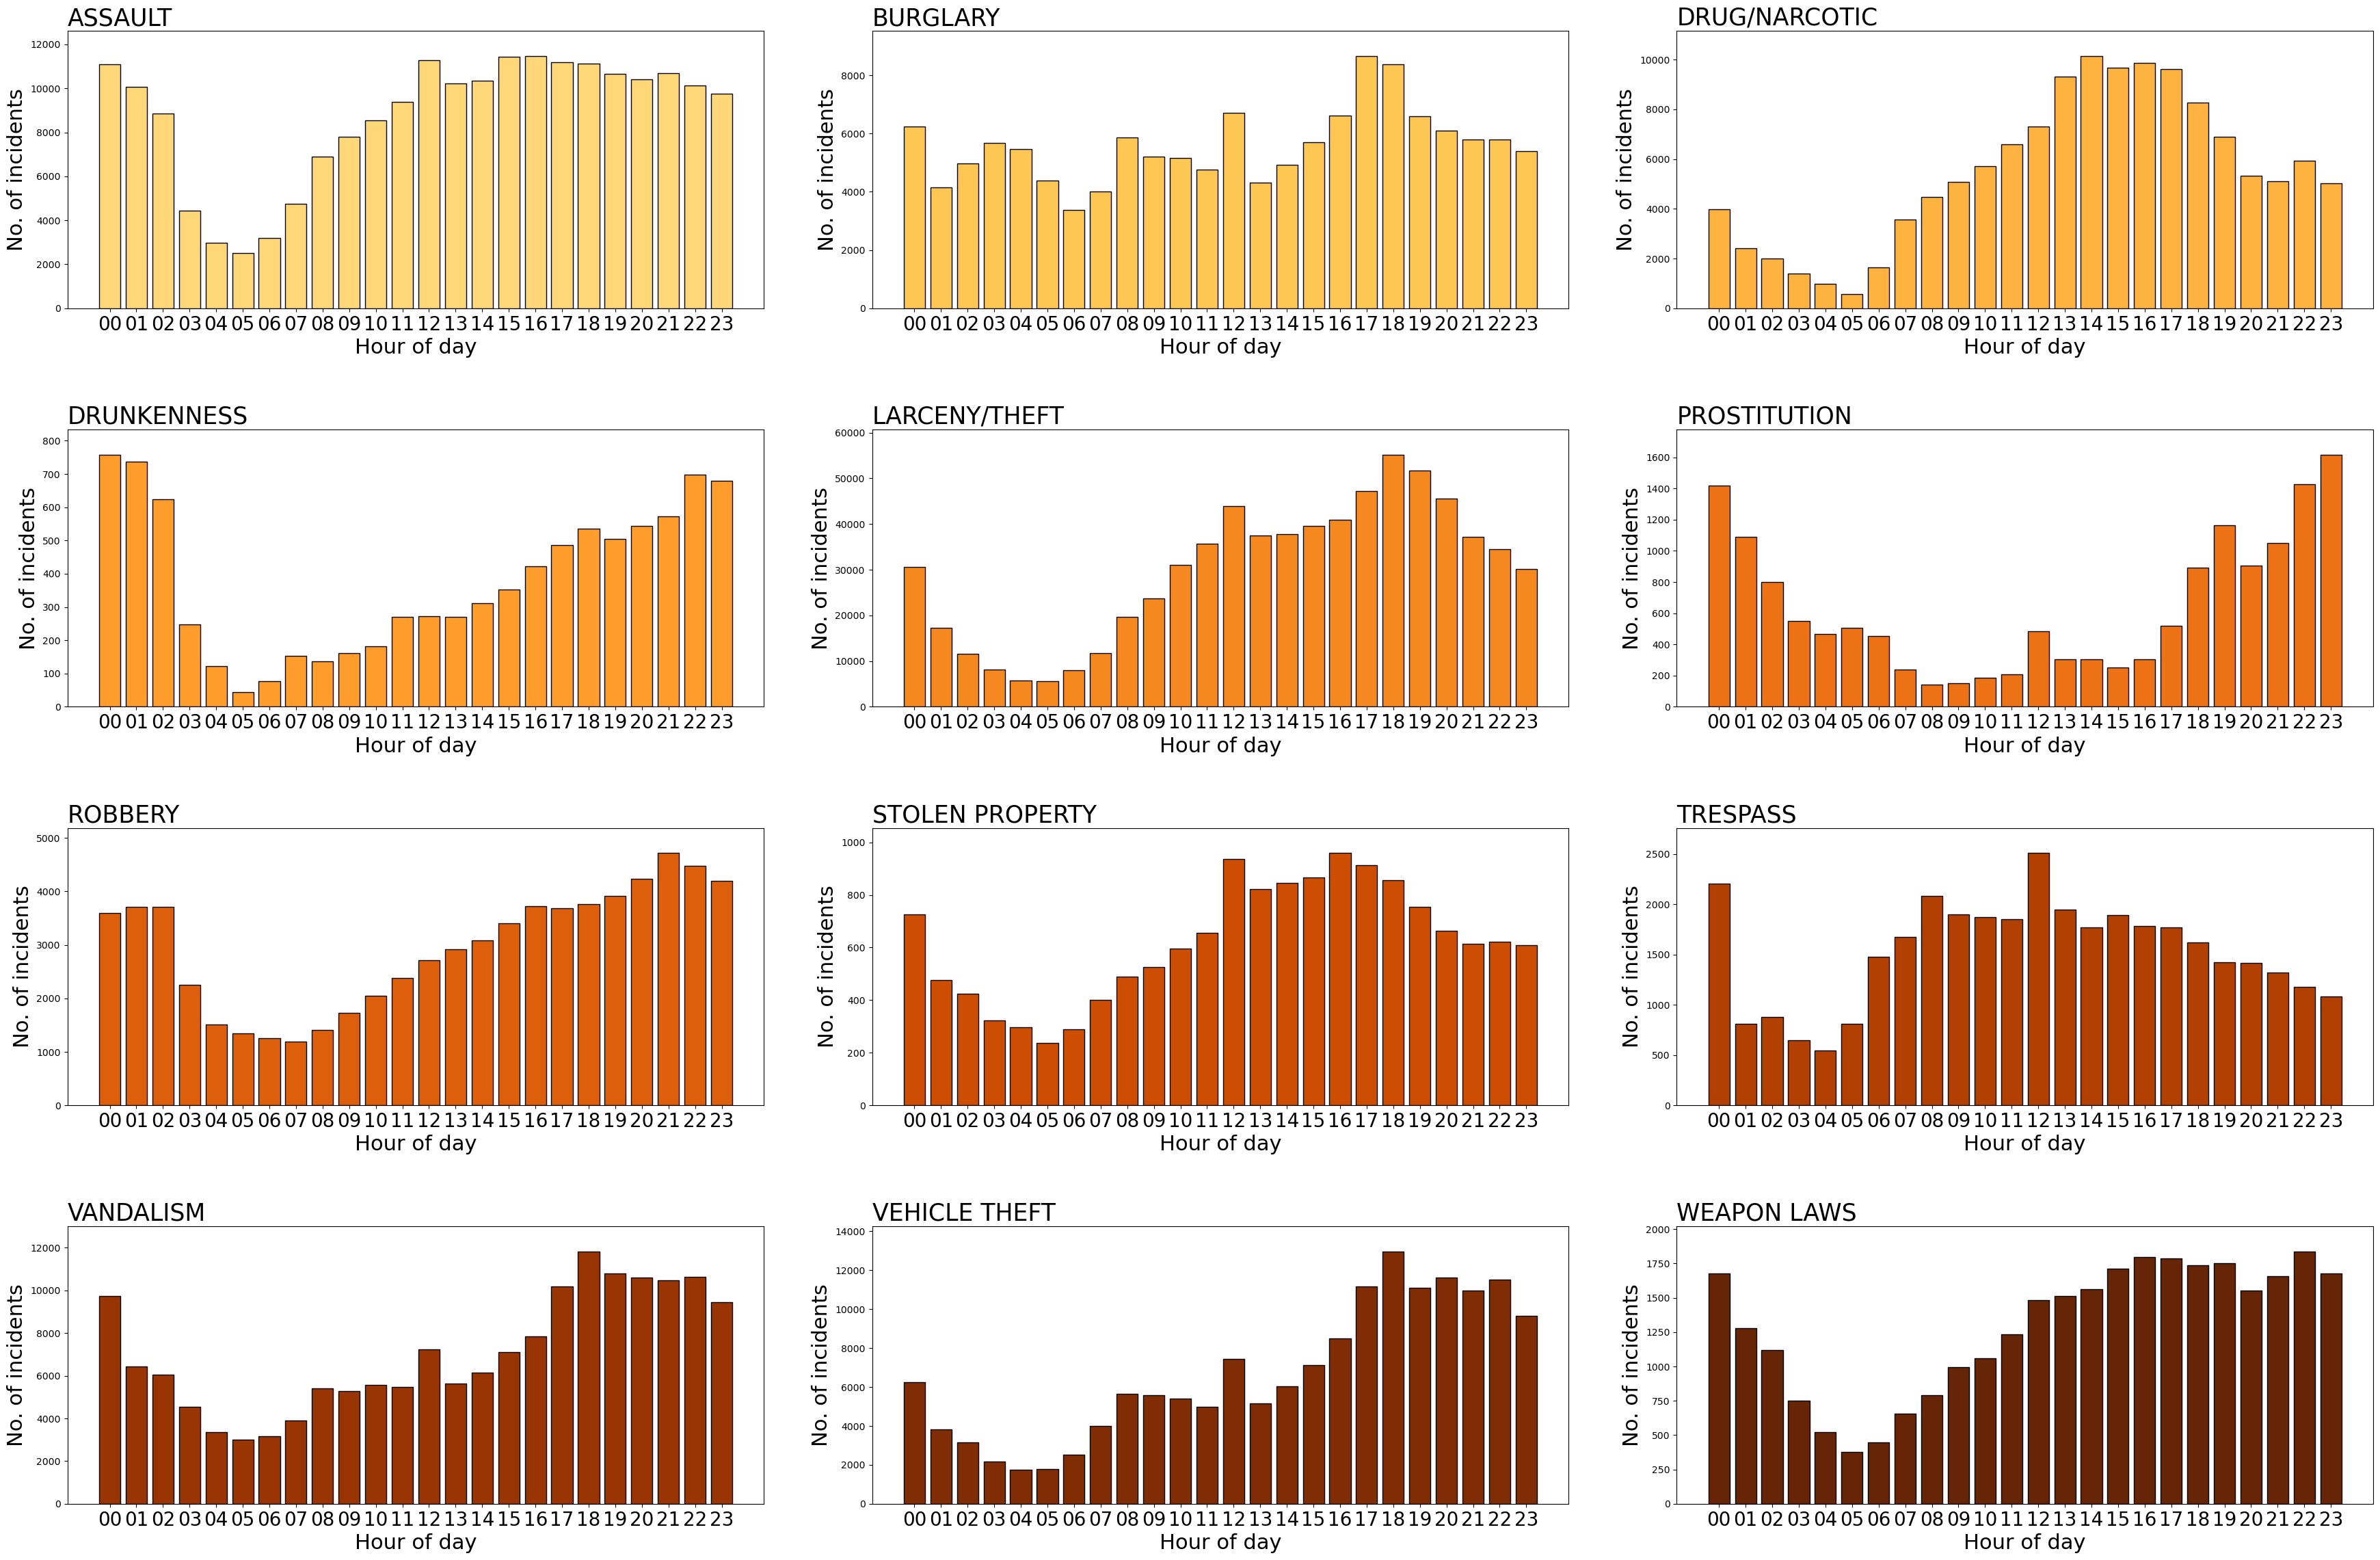

In [152]:
# Create a grid of subplots based on number of focus crimes

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 20
label_fontsize = 22

# Colors shades
colors = plt.cm.YlOrBr(np.linspace(0.3, 1, len(focuscrimes)))

# Dimensions of the grid
no_cols = 3
no_rows = int(len(focuscrimes)/no_cols)

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        12*no_cols,  # Hardcoded width of 8 inches per column 
        6*no_rows   # Hardcoded height of 4 inches per row
    ), 
    sharex=False
)

# Flatten for easier indexing
axs = axs.flatten()

# Find the maximum value for the y-axis
max_val = hour_groupings.max().max()

# PLOTTING THE DATA
for i, (category, count) in enumerate(hour_groupings.iterrows()):
    axs[i].bar(hours_abrv, count, color=colors[i], edgecolor='black')
    axs[i].set_ylim(
        # count.min()*0.9, # Uncomment to show the min to max span
        0, 
        # max_val*1.1, # Uncomment to show set the same y-axis for all plots
        count.max()*1.1,
    )
    axs[i].set_title(category, loc='left', fontsize = subtitle_fontsize)
    axs[i].set_xticks(hours_abrv)
    axs[i].tick_params(axis='x', labelsize = tick_fontsize)
    axs[i].set_ylabel('No. of incidents', fontsize = label_fontsize)
    axs[i].set_xlabel('Hour of day', fontsize = label_fontsize)

fig.tight_layout(pad = 5.0)
plt.savefig(os.path.join(plots_path, "W2_ex2_catperhour.pdf"), format="pdf", bbox_inches="tight")
plt.show()

Looking at the trends, it shows that the early morning hours tend to contain less incidents compared against the rest of the day. Additionally, it seems that the incidents spike in the late afternoon to evening hours. Some of the crimes are heavily related to activities that take place in the later hours, such as drinking and prostitution. On the other side; theft and trespass suggest to be following regular opening hours of most businessess, such as grocery stores and offices.   

> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

In [153]:
# Generate a new x-axis that spans the full week (168 hours)
hours_of_week = [f"{h:02d}" for h in range(168)]  # 0 to 167 representing hours in the week

# Prepare tick labels with day names at midnights
tick_positions = [h * 24 for h in range(7)]
tick_labels = [days_abrv[d] for d in range(7)]

# Group data: Crime count per category per hour of the week
df_focus['HourOfWeek'] = df_focus['Day of Week'].map({day: i for i, day in enumerate(days_long)}) * 24 + df_focus['Hour']
hour_week_groupings = df_focus.groupby(['Category', 'HourOfWeek']).size().unstack(fill_value=0).reindex(columns=range(168), fill_value=0)

C:\Users\Aleksandar\AppData\Local\Temp\ipykernel_9852\1581328790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus['HourOfWeek'] = df_focus['Day of Week'].map({day: i for i, day in enumerate(days_long)}) * 24 + df_focus['Hour']


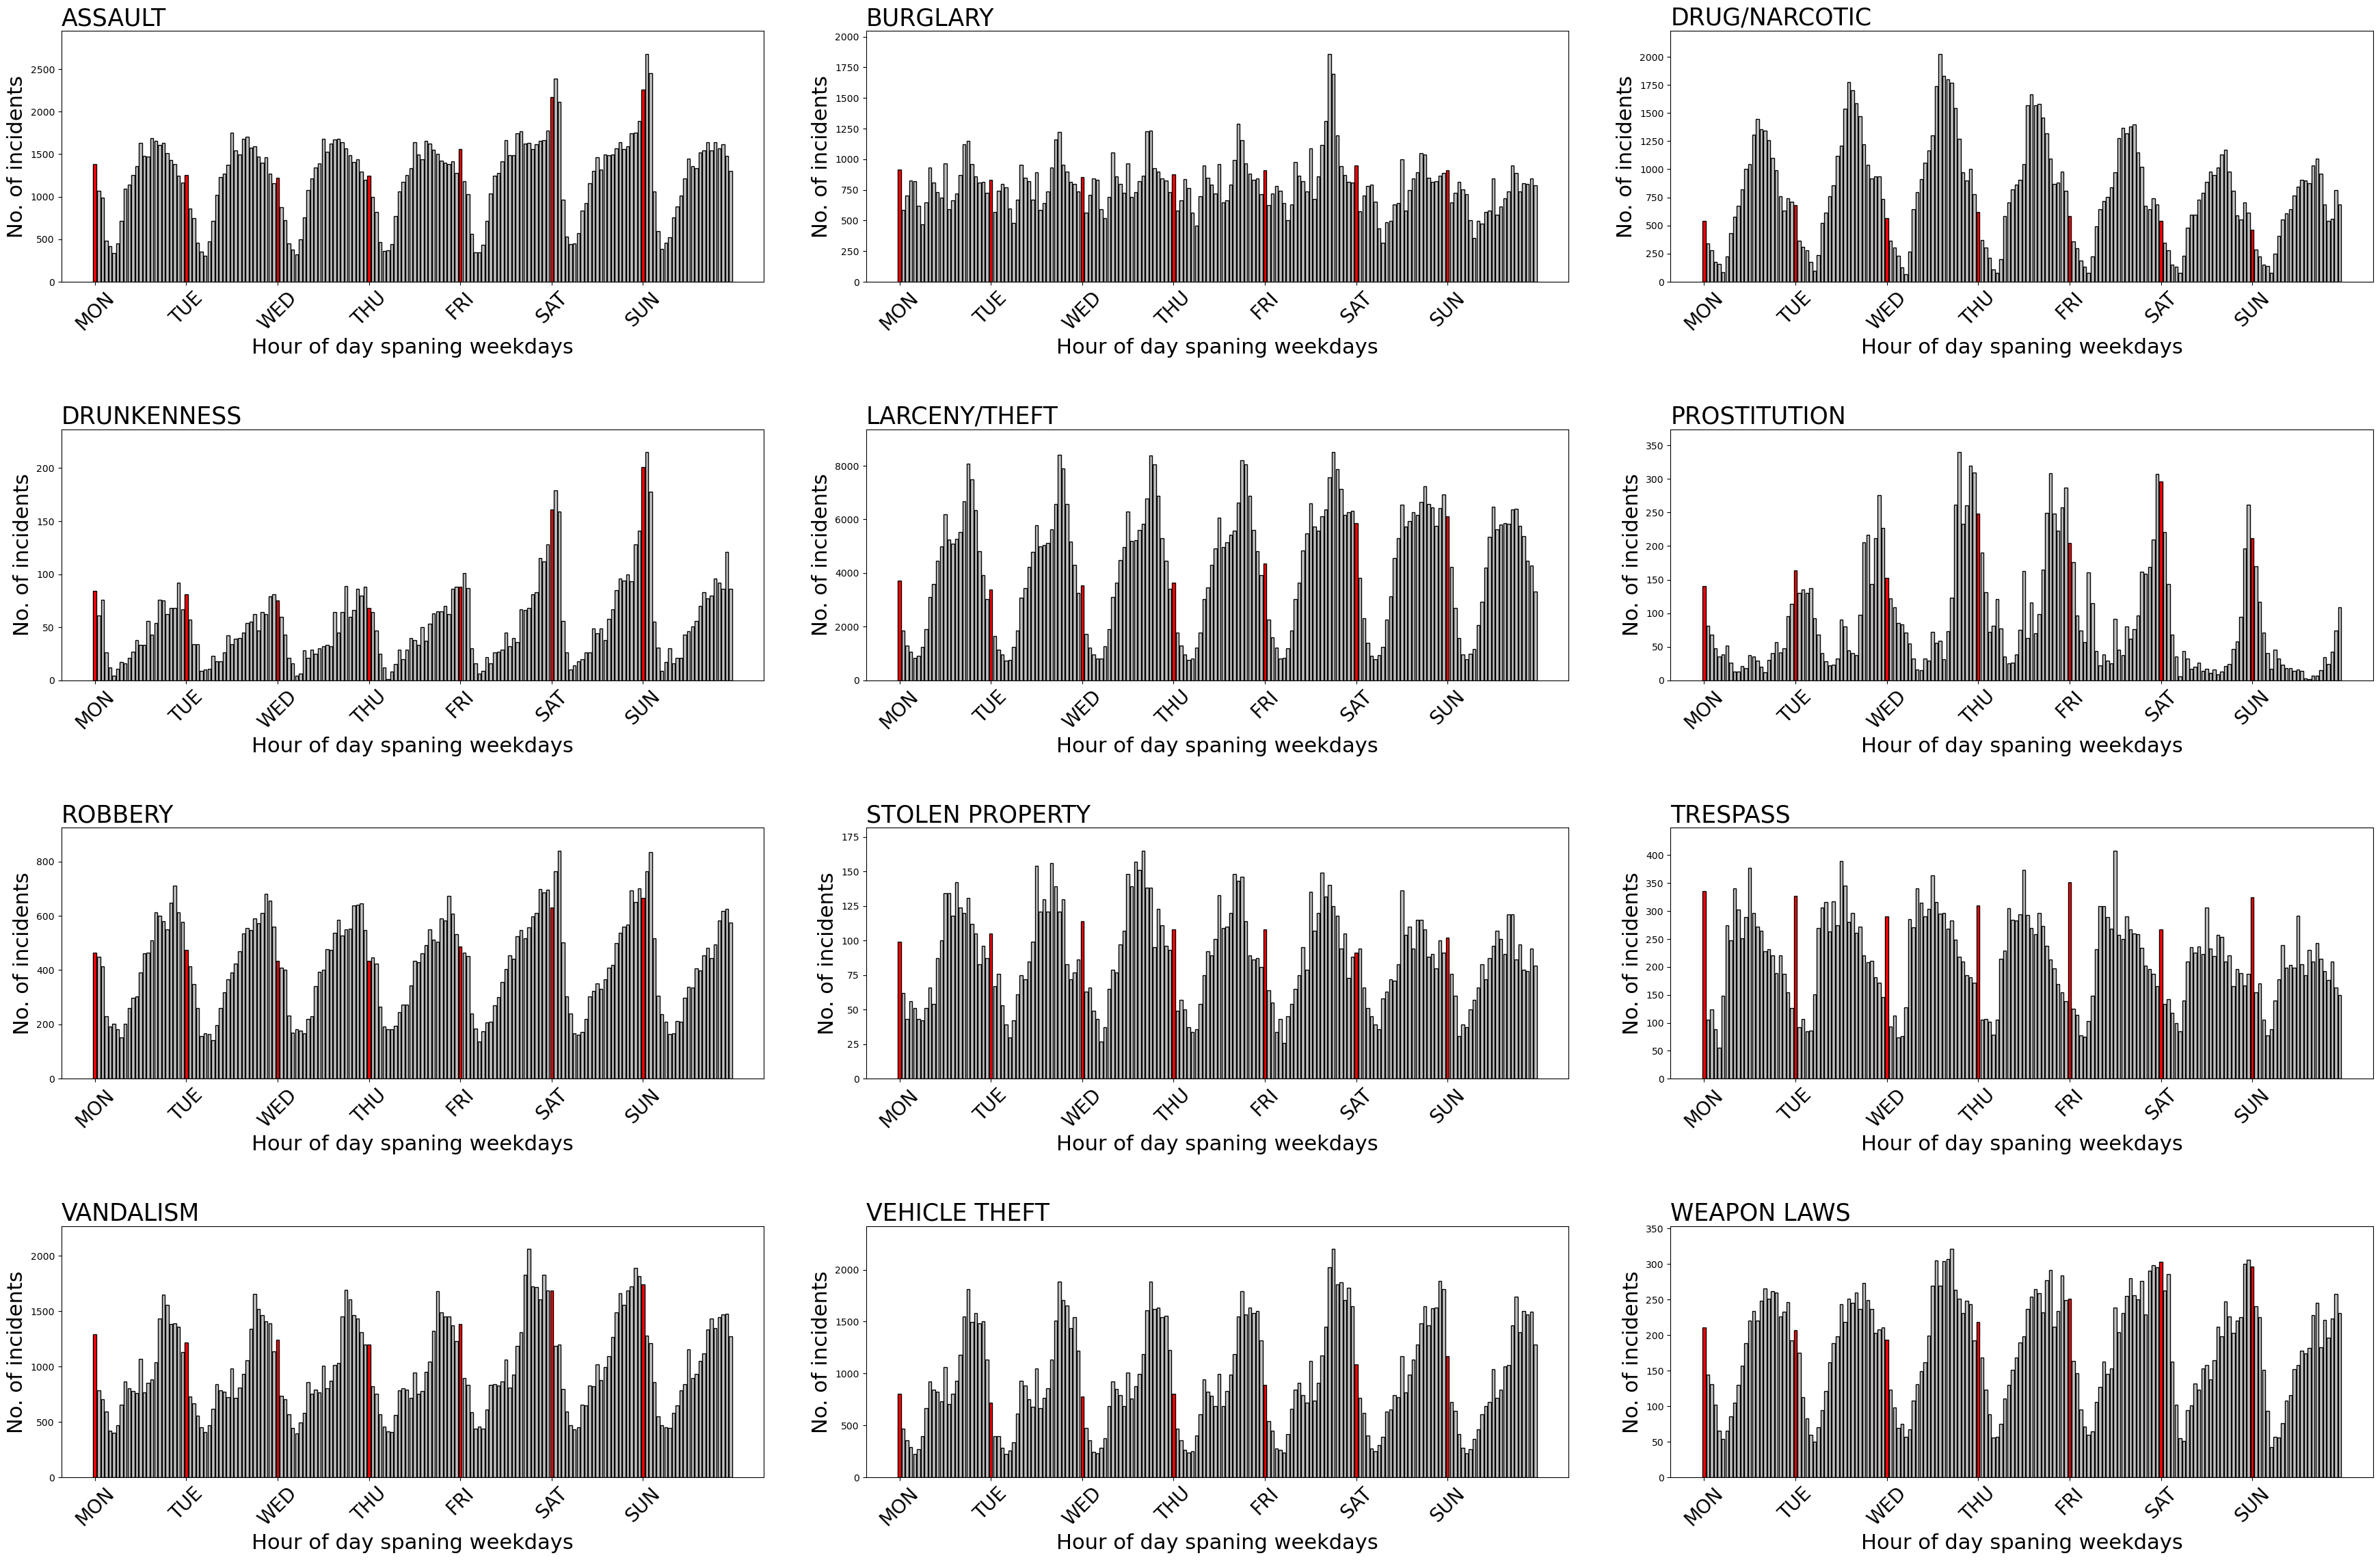

In [154]:
# Create a grid of subplots based on number of focus crimes

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 20
label_fontsize = 22

# Dimensions of the grid
no_cols = 3
no_rows = int(len(focuscrimes) / no_cols)

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        12*no_cols,  # Hardcoded width of 8 inches per column 
        6*no_rows   # Hardcoded height of 4 inches per row
    ), 
    sharex=False
)

# Flatten subplot array
axs = axs.flatten()

# Find the maximum value for the y-axis
max_val = hour_week_groupings.max().max()

# Plot each category
for i, (category, count) in enumerate(hour_week_groupings.iterrows()):
    axs[i].bar(hours_of_week, count, color='silver')
    axs[i].set_ylim(
        # count.min()*0.9, # Uncomment to show the min to max span
        0, 
        # max_val*1.1, # Uncomment to show set the same y-axis for all plots
        count.max()*1.1,
    )
    axs[i].set_title(category, loc='left', fontsize=subtitle_fontsize)

    # Set x-ticks at midnight for each day
    axs[i].set_xticks(tick_positions)
    axs[i].set_xticklabels(tick_labels, fontsize=tick_fontsize)
    axs[i].tick_params(axis='x', which='both', labelrotation=45)
    axs[i].set_ylabel('No. of incidents', fontsize = label_fontsize)
    axs[i].set_xlabel('Hour of day spaning weekdays', fontsize = label_fontsize)

    # # Update color for each midnight to show the start of a new day
    for idx, bar in enumerate(axs[i].patches):
        if idx % 24 == 0:
            bar.set_color("red")
        bar.set_edgecolor('black')

fig.tight_layout(pad=5.0)
plt.savefig(os.path.join(plots_path, "W2_ex2_catperhourweek.pdf"), format="pdf", bbox_inches="tight")
plt.show()

**Fun little thing**: To further make the point of the exercise in Part 1, check out this video on youtube https://www.youtube.com/watch?v=DbJyPELmhJc  

# Part 3: Creating nice plots
> *Exercise:* Nice plots. 
>
> * Create a list of 10 rules for nice plots based on the video.

**Rule 1 - _Subplots_:** 
* If we need to show multiple (similar) plots regarding the same problem or data, we should strongly consider using subplots. 

**Rule 2 - _Crop tightly_:** 
* When presenting plots in a paper, it is important to zoom it tighly, reducing redundant spacing. 

**Rule 3 - _Labels_:** 
* "Plots with no labels will get you fired!". It is important to show the reader what the data is, i.e. think of it as providing neccessary metadata for context. 

**Rule 4 - _Axes 1 Meaningful values_:** 
* The axes tick intervals and values should intuitivly make sense, e.g. intervals of 7 for days to associate with weeks.

**Rule 5 - _Axes 2 Truthful limits_:** 
* The axes should not leave out information in order to show trends, e.g. zooming in on the y-axis in order to show differences, when these in reality are miniscule.

**Rule 6 - _Axes 3 Subplot limits_:** 
* The axes limits of subplots should not differ if compared direcctly, e.g. when working with quantities and not concentrations.

**Rule 7 - _Data to Ink ratio 1_:** 
* The amount of the total ink used to present data should be maximized; _Keep it simple and straight to the point_! 

**Rule 8 - _Data to Ink ratio 2_:** 
* Redundent visualisation should be removed to highlight the important parts of the data; _Less is more_!

**Rule 9 - _Fonts_:** 
* Changing the font is just an example of showing attention to detail. Be thoughtful with how you present your findings.

**Rule 10 - _Captions_:** 
* Captions are very useful to convey information alongside visualizations. A good caption will explain each component of the graphic and clearing up any potential confusion.

# Part 4: Exploring other types of plots for temporal data

We continue our mini-break from barcharts by exploring more ways to plot temporal data.

> *Exercise:* Other cool ways to plot temporal data. I am going to introduce three different plot-types. Then your job is to choose a part of the crime-data that you care about - and plot it using these new ways of visualizing data. <font color="grey">For this one, you may use the full power of your LLM! Yes, I'm serious. Go nuts and see if you can get these plots going by fully relying on code generated by your LLM</font>. In case you want to use the *old ways* (that's of course always OK), I've included links and tips. 
>
>I recommend that you choose a different part of the crime-data for each plot-type.

In [155]:
# Reminder of what the data looks like
df.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,MonthName,Year
0,VANDALISM,NORTHERN,-122.428505,37.779534,Thursday,0,1,1,January,2004
1,VANDALISM,RICHMOND,-122.462415,37.783951,Thursday,0,1,1,January,2004
2,LARCENY/THEFT,BAYVIEW,-122.402541,37.728700,Thursday,0,1,1,January,2004
3,NON-CRIMINAL,SOUTHERN,-122.403405,37.775421,Thursday,0,1,1,January,2004
4,NON-CRIMINAL,RICHMOND,-122.477371,37.783277,Thursday,0,1,1,January,2004


> * Calendar plots. Get started on calendar plots **[here](https://calplot.readthedocs.io/en/latest/)**. There are other packages for plotting these, those are also OK to use.

In [156]:
%%capture
%pip install calplot

In [157]:
import calplot

In [158]:
# Create a Date column by combining Year, Month, and Day
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Count incidents per date
events = df['Date'].value_counts().sort_index()

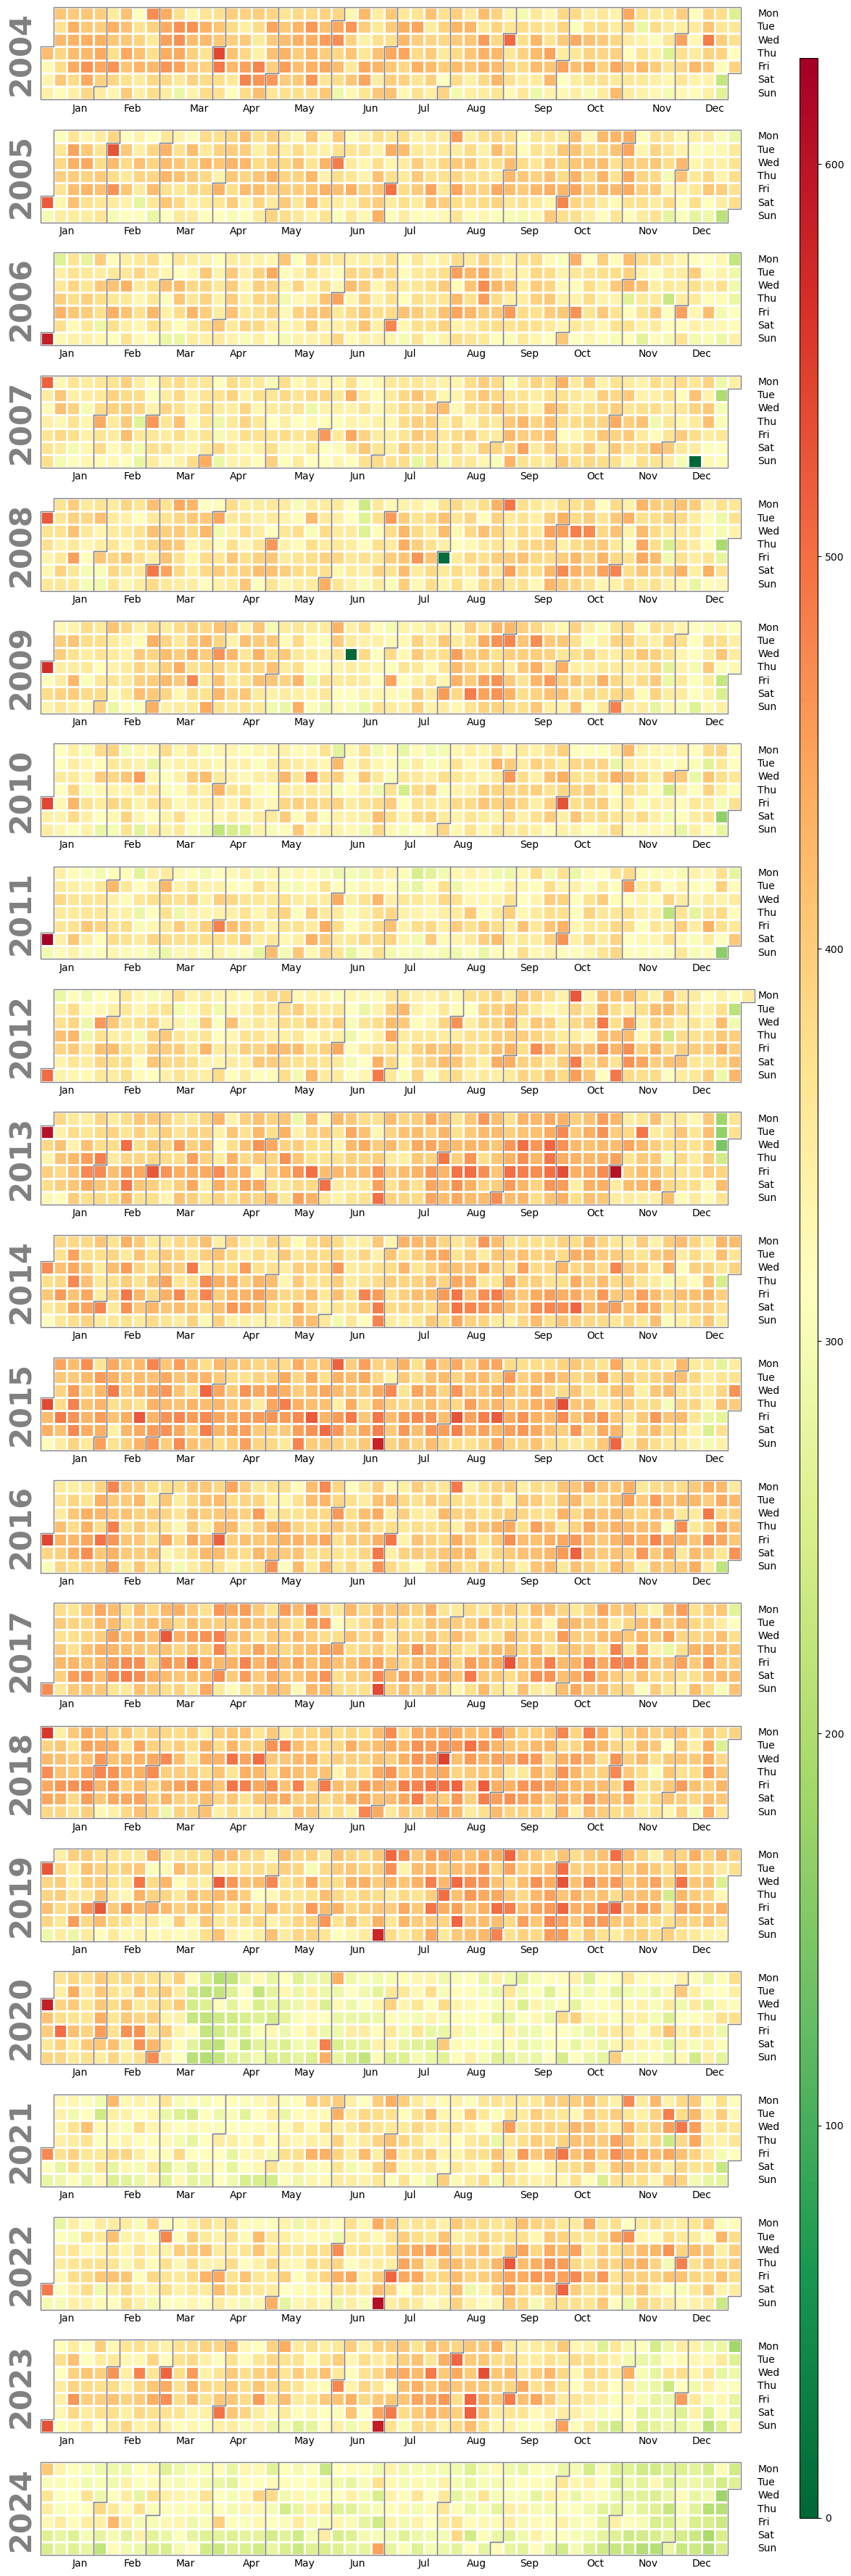

In [159]:
# Create colormap from green to red (few to many incidents)
cmap_orig = plt.colormaps['RdYlGn']
cmap_reversed = cmap_orig.reversed()

# Plot the calendar heatmap
calplot.calplot(
    data=events, 
    cmap=cmap_reversed, 
    fillcolor="Blue",
    colorbar=True,
    yearlabel_kws={
        'fontname':'sans-serif'
    }
)

# show plot ot supress the return value of the calplot function
plt.savefig(os.path.join(plots_path, "W2_ex4_calplot.pdf"), format="pdf", bbox_inches="tight")
plt.show()

> * [Polar bar chart](https://user-images.githubusercontent.com/12328192/89272649-be76e200-d63e-11ea-97ad-fd1ba5831c89.png). Here I want you to plot a 24-hour pattern of some sort -- those work really well in radial plots (another name for polar plots) because the day  wraps around on itself. You can also try plotting data with patterns from the 168 hours of the week. There's not one super-awesome solution here, you can try using [pure matplotlib](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html) ... [some examples here](https://www.python-graph-gallery.com/circular-barplot/) or via [plotly](https://plotly.com/python/polar-chart/) (scroll down a bit for the polar barchart).

#### 24-Hour Polar Bar chart with number of reported incidents per hour

In [160]:
# Count incidents
incident_per_hour = df['Hour'].value_counts().sort_index()
incident_per_hour

Hour
0     152425
1      83126
2      70104
3      49360
4      37776
5      33766
6      45928
7      69850
8     103929
9     114421
10    125792
11    131844
12    177762
13    143202
14    145975
15    155488
16    162043
17    173992
18    178579
19    160092
20    146305
21    136688
22    138711
23    125881
Name: count, dtype: int64

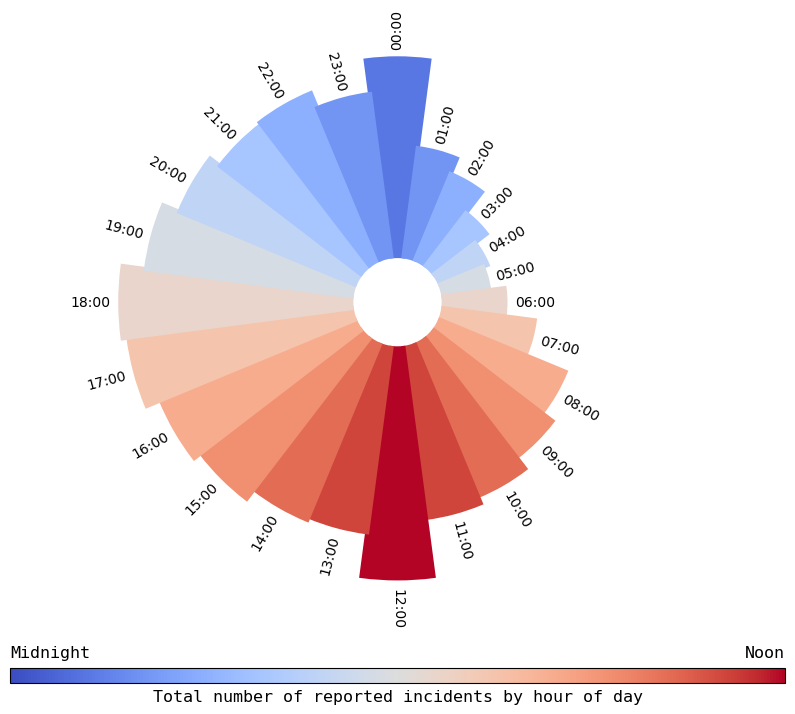

In [161]:
# set figure size
plt.figure(figsize=(10,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 25

# Normalize the data for easier plotting
v = incident_per_hour.values
v_norm = (v - v.min())/(v.max() - v.min())

# Compute the heights (radius) of the bars from the normalized data
heights = upperLimit*v_norm + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(incident_per_hour.index)

# Compute the angle each bar is centered on:
indexes = list(reversed(range(1, len(incident_per_hour.index)+1)))
angles = [element * width for element in indexes]

# Rotate the plot 90 degrees counter-clockwise
angles = [angle + np.pi / 2 for angle in angles]

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=3, 
    edgecolor="white",
    color="deepskyblue",
)

# little space between the bar and the label
labelPadding = 5.0

# Colors shades
colors_ori = plt.cm.coolwarm(np.linspace(0.1, 1, 13)).tolist()
colors_rev = list(reversed(colors_ori[:-1]))
colors = colors_ori + colors_rev
c = 0

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, incident_per_hour.index):

    # Coloring the bars using the colormap
    bar.set_color(colors[c])
    c += 1

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    # print(height)
    ax.text(
        x=angle, 
        y=lowerLimit + height + labelPadding, 
        s=f"{label:02d}:00", 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor"
    ) 

# CODE FOR CREATING COLORBAR
# Create a ScalarMappable to map values to colors
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=v.min(), vmax=v.max()))
sm.set_array([])  # this is needed for the colorbar to display correctly

# Add the colorbar
fig = plt.gcf()  # Get the current figure
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=50)
cbar.set_label('Total number of reported incidents by hour of day', fontsize=12, fontname='monospace')
# ticks = [v.min()] + list(range(40000, v.max(), 10000)) + [v.max()]
ticks = []

cbar.set_ticks(ticks)
# cbar.ax.set_xticklabels(
#     ticks, 
#     rotation=45, 
#     fontname='monospace'
# )

# Add "min" and "max" labels at each end
cbar.ax.text(v.min(), 2, 'Midnight', ha='left', va='center', fontsize=12, fontname='monospace')
cbar.ax.text(v.max(), 2, 'Noon', ha='right', va='center', fontsize=12, fontname='monospace')

plt.savefig(os.path.join(plots_path, "W2_ex4_polarbarplot_hours.pdf"), format="pdf", bbox_inches="tight")
plt.show()

#### Polar Bar chart with total number of reported incidents per category

In [162]:
# # Count incidents per date
# incident_per_category = df["Category"].value_counts().to_frame("No_of_incidents").reset_index().rename(columns={"index": "Value"})

# incident_per_category = incident_per_category.sort_values(
#     by=["No_of_incidents"], 
#     ascending=[True],
#     na_position='last'
# )

# incident_per_category

# Count incidents
incident_per_category = df["Category"].value_counts().sort_index().sort_values()
incident_per_category

Category
HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE         3
TREA                                                14
HUMAN TRAFFICKING, COMMERCIAL SEX ACTS              23
SEX OFFENSES, NON FORCIBLE                          41
PORNOGRAPHY/OBSCENE MAT                             51
HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS         115
HOMICIDE                                           186
RAPE                                               236
GAMBLING                                           358
VEHICLE MISPLACED                                  394
EXTORTION                                          675
VEHICLE IMPOUNDED                                  708
BRIBERY                                            751
BAD CHECKS                                         781
CIVIL SIDEWALKS                                    890
SEX OFFENSE                                       1054
FIRE REPORT                                       1363
SUICIDE                                           1593
L

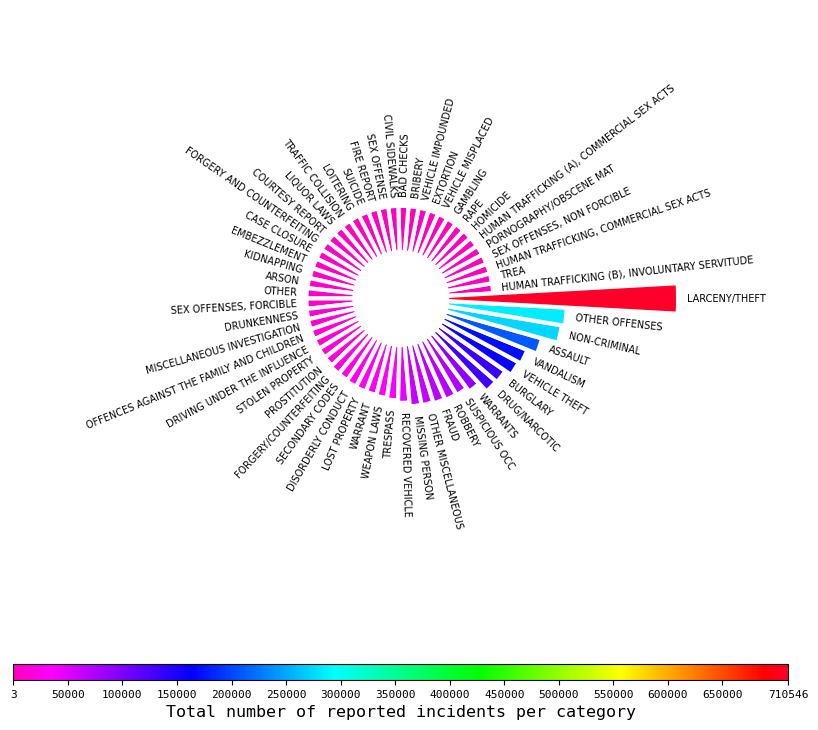

In [163]:
# Set figure size
plt.figure(figsize=(10,10))

# Plot polar axis
ax = plt.subplot(111, polar=True)

# Remove grid
plt.axis('off')

# Set the coordinate limits
upperLimit = 100
lowerLimit = 25

# Normalize the data for easier plotting
v = incident_per_category.values
v_norm = (v - v.min()) / (v.max() - v.min())

# Compute the heights (radius) of the bars from the normalized data
heights = upperLimit * v_norm + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(incident_per_category.index)

# Compute the angle each bar is centered on
indexes = list(range(1, len(incident_per_category.index) + 1))
angles = [element * width for element in indexes]

# Rotate the plot 90 degrees counterclockwise
# angles = [angle + np.pi / 2 for angle in angles]

# Create a ScalarMappable to map values to colors
cmap = plt.colormaps['gist_rainbow'].reversed()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=v.min(), vmax=v.max()))
sm.set_array([])  # Needed for the colorbar to display correctly

# Assign colors to bars based on height values
bar_colors = sm.to_rgba(incident_per_category.values)  # Convert height values to colors

# Draw bars with dynamically assigned colors
bars = ax.bar(
    x=angles,
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=3, 
    edgecolor="white",
    color=bar_colors
)

# Little space between the bar and the label
labelPadding = 5.0

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, incident_per_category.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation += 180
    else: 
        alignment = "left"

    # Finally add the labels
    # print(height)
    ax.text(
        x=angle, 
        y=lowerLimit + height + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        fontsize=7
    )

# Add the colorbar
fig = plt.gcf()  # Get the current figure
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=50)
cbar.set_label('Total number of reported incidents per category', fontsize=12, fontname='monospace')
ticks = [v.min()] + list(range(50000, 700000, 50000)) + [v.max()]

cbar.set_ticks(ticks)
cbar.ax.set_xticklabels(
    ticks, 
    # rotation=15, 
    fontname='monospace',
    fontsize=8,
)

plt.savefig(os.path.join(plots_path, "W2_ex4_polarbarplot_category.pdf"), format="pdf", bbox_inches="tight")
plt.show()

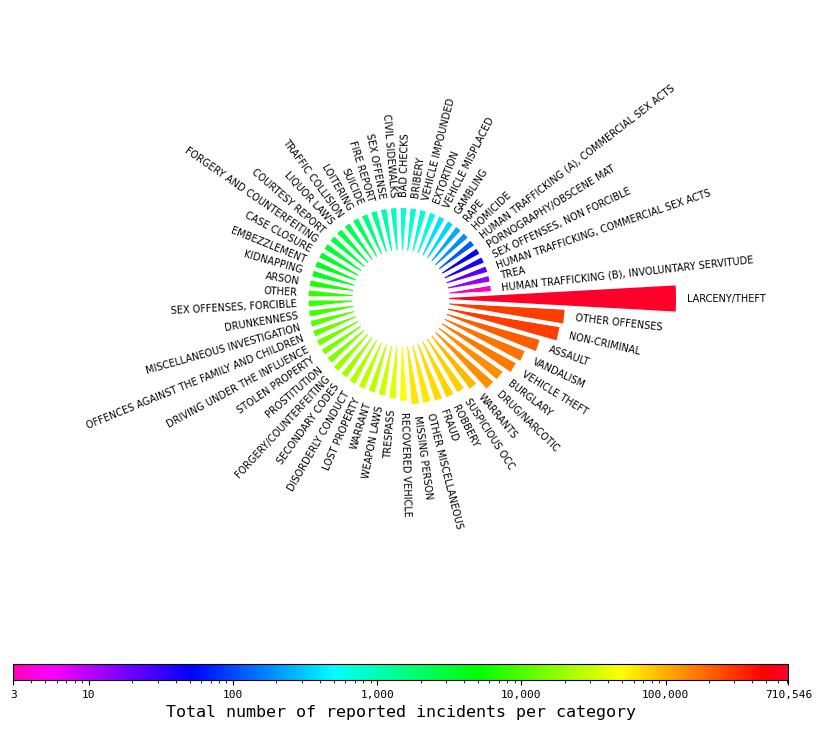

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Import LogNorm

# Set figure size
plt.figure(figsize=(10,10))

# Plot polar axis
ax = plt.subplot(111, polar=True)

# Remove grid
plt.axis('off')

# Set the coordinate limits
upperLimit = 100
lowerLimit = 25

# Normalize the data for easier plotting
v = incident_per_category.values
v[v <= 0] = 1  # Ensure all values are positive for LogNorm

v_norm = (v - v.min()) / (v.max() - v.min())

# Compute the heights (radius) of the bars from the normalized data
heights = upperLimit * v_norm + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(incident_per_category.index)

# Compute the angle each bar is centered on
indexes = list(range(1, len(incident_per_category.index) + 1))
angles = [element * width for element in indexes]

# Rotate the plot 90 degrees counterclockwise
# angles = [angle + np.pi / 2 for angle in angles]

# Create a ScalarMappable to map values to colors using a Logarithmic scale
cmap = plt.colormaps['gist_rainbow'].reversed()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mcolors.LogNorm(vmin=v.min(), vmax=v.max()))
sm.set_array([])  # Needed for the colorbar to display correctly

# Assign colors to bars based on log-scaled values
bar_colors = sm.to_rgba(v)  # Convert log-transformed values to colors

# Draw bars with dynamically assigned colors
bars = ax.bar(
    x=angles,
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=3, 
    edgecolor="white",
    color=bar_colors
)

# Little space between the bar and the label
labelPadding = 5.0

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, incident_per_category.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = "right" if np.pi/2 <= angle < 3*np.pi/2 else "left"
    rotation += 180 if alignment == "right" else 0

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + height + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",
        fontsize=7
    )

# Add the colorbar with logarithmic ticks
fig = plt.gcf()  # Get the current figure
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, aspect=50)
cbar.set_label('Total number of reported incidents per category', fontsize=12, fontname='monospace')

# Set logarithmic scale for colorbar ticks
log_ticks = [v.min()] + list(np.logspace(np.log10(10), np.log10(1_000_000), num=6)[:-1]) + [v.max()]

cbar.set_ticks(log_ticks)
cbar.ax.set_xticklabels(
    [f"{int(tick):,}" for tick in log_ticks],  # Format labels as integers
    fontname='monospace',
    fontsize=8,
)

plt.savefig(os.path.join(plots_path, "W2_ex4_polarbarplot_category_log.pdf"), format="pdf", bbox_inches="tight")
plt.show()

> * Time series. Time series is a key functionality of `Pandas`, so here I simply recommend starting by searching your favorite search engine for something like `time series` `pandas`

Going through the [GeeksforGeeks Time Series Manipulation](https://www.geeksforgeeks.org/pandas-time-series-manipulation/), we learned how Time series are used to organize data by timestamps.

The main objectives of _**Time Series Analysis**_ are:

- Create a series of date
- Work with data timestamp
- Convert string data to timestamp
- Slicing of data using timestamp
- Resample your time series for different time period aggregates/summary statistics
- Working with missing data


> * Reflection (<font color="grey">no LLM help here</font>): What did you learn from using LLM's to simply solve everything in this exercise (in contrast to the previous ones).

In this exercise, we primarily used the provided - or found documentation for the matplotlib plots. Some polishing was provided by ChatGPT to speed up the process, but it was solely used for cosmetic purposes.

# Part 5: Back to visualizing patterns in the data

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco. <font color="grey">See if you can do this on your own - the calculations are fairly simple. If you get stuck, you may ask your LLM for advice, but don't use it to simply generate the plots. Use it as a help to get hints at how to solve the things you can't figure out on your own.</font>

> *Exercise*: The types of crime and how they take place across San Francisco's police districts.

>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.

In [165]:
police_districts = list(df["Police District"].unique())
print(*police_districts, sep="\n")

NORTHERN
RICHMOND
BAYVIEW
SOUTHERN
CENTRAL
INGLESIDE
TARAVAL
TENDERLOIN
MISSION
PARK
nan
OUT OF SF


This shows, that there are incidents in the dataset, which are either not categorised or outside San Francisco. Thus, we need to remove the rows, which are not in the SF police departments.

In [166]:
# Remove NaN values and "OUT OF SF" from the dataset
df_clean = df[df["Police District"] != "OUT OF SF"].dropna()

# Check if the cleaning was successful
police_districts = list(df_clean["Police District"].unique())
print(*police_districts, sep="\n")

NORTHERN
RICHMOND
BAYVIEW
SOUTHERN
CENTRAL
INGLESIDE
TARAVAL
TENDERLOIN
MISSION
PARK


>  * Which has the most crimes? Which has the most focus crimes?

In [167]:
df_clean['Category']

0                                         VANDALISM
1                                         VANDALISM
2                                     LARCENY/THEFT
3                                      NON-CRIMINAL
4                                      NON-CRIMINAL
                             ...                   
2863032                               LOST PROPERTY
2863034                               LOST PROPERTY
2863035    OFFENCES AGAINST THE FAMILY AND CHILDREN
2863036                                   VANDALISM
2863037                                       FRAUD
Name: Category, Length: 2802455, dtype: object

In [168]:
# Group by Police District and Category, then count occurrences
pd_cat_groupings = df_clean.groupby(["Category", "Police District"], as_index=True).size().unstack().reindex(columns = df_clean["Police District"].unique())

# Count incidents per PD
pd_cat_sum = pd_cat_groupings.sum().sort_index()
print(pd_cat_sum)

# Display the dataframe
pd_cat_groupings

Police District
BAYVIEW       267187.0
CENTRAL       329877.0
INGLESIDE     235064.0
MISSION       373746.0
NORTHERN      362937.0
PARK          148689.0
RICHMOND      154368.0
SOUTHERN      462159.0
TARAVAL       205386.0
TENDERLOIN    263042.0
dtype: float64


Police District,NORTHERN,RICHMOND,BAYVIEW,SOUTHERN,CENTRAL,INGLESIDE,TARAVAL,TENDERLOIN,MISSION,PARK
Category,,,,,,,,,,
ARSON,721.0,323.0,1280.0,781.0,604.0,586.0,437.0,368.0,777.0,232.0
ASSAULT,23347.0,7921.0,24546.0,33585.0,21001.0,19681.0,12763.0,25061.0,32586.0,8397.0
BAD CHECKS,116.0,56.0,63.0,140.0,110.0,62.0,92.0,33.0,81.0,28.0
BRIBERY,48.0,23.0,146.0,104.0,45.0,134.0,47.0,38.0,139.0,27.0
BURGLARY,21565.0,9617.0,12759.0,18024.0,17051.0,12158.0,12441.0,5412.0,14930.0,9730.0
CASE CLOSURE,313.0,198.0,241.0,827.0,500.0,226.0,225.0,255.0,209.0,188.0
CIVIL SIDEWALKS,29.0,11.0,NaN,12.0,30.0,NaN,NaN,4.0,203.0,599.0
COURTESY REPORT,67.0,65.0,112.0,75.0,73.0,68.0,74.0,159.0,118.0,33.0
DISORDERLY CONDUCT,3045.0,932.0,2276.0,3326.0,2642.0,1594.0,1452.0,3905.0,4756.0,1053.0


In [169]:
# Count incidents per PD
pd_cat_sum = pd_cat_groupings.sum().sort_index()
print("Total number of incidents per Police District:")
print(pd_cat_sum, "\n")

print("Police District with the most incidents:")
print("--->", pd_cat_sum.idxmax(), pd_cat_sum.max())

Total number of incidents per Police District:
Police District
BAYVIEW       267187.0
CENTRAL       329877.0
INGLESIDE     235064.0
MISSION       373746.0
NORTHERN      362937.0
PARK          148689.0
RICHMOND      154368.0
SOUTHERN      462159.0
TARAVAL       205386.0
TENDERLOIN    263042.0
dtype: float64 

Police District with the most incidents:
---> SOUTHERN 462159.0


In [ ]:
# Extract only the rows where the "Category" is in Focus-crimes
focuscrimes = set([
    'ASSAULT',
    'BURGLARY',
    # "DISORDERLY CONDUCT",
    # "DRIVING UNDER THE INFLUENCE",
    'DRUG/NARCOTIC',
    'DRUNKENNESS',
    'LARCENY/THEFT',
    'PROSTITUTION',
    'ROBBERY',
    'STOLEN PROPERTY',
    'TRESPASS',
    'VANDALISM',
    'VEHICLE THEFT',
    'WEAPON LAWS',
])

pd_cat_groupings_focus = pd_cat_groupings.loc[pd_cat_groupings.index.isin(focuscrimes)]

# Display the dataframe
pd_cat_groupings_focus

Police District,NORTHERN,RICHMOND,BAYVIEW,SOUTHERN,CENTRAL,INGLESIDE,TARAVAL,TENDERLOIN,MISSION,PARK
Category,,,,,,,,,,
ASSAULT,23347.0,7921.0,24546.0,33585.0,21001.0,19681.0,12763.0,25061.0,32586.0,8397.0
BURGLARY,21565.0,9617.0,12759.0,18024.0,17051.0,12158.0,12441.0,5412.0,14930.0,9730.0
DISORDERLY CONDUCT,3045.0,932.0,2276.0,3326.0,2642.0,1594.0,1452.0,3905.0,4756.0,1053.0
DRIVING UNDER THE INFLUENCE,1298.0,1141.0,1133.0,1779.0,1195.0,1237.0,974.0,1378.0,2743.0,769.0
DRUG/NARCOTIC,11275.0,2247.0,9410.0,21761.0,4916.0,5189.0,3272.0,47186.0,19548.0,5783.0
DRUNKENNESS,756.0,330.0,532.0,2018.0,1110.0,415.0,638.0,906.0,1742.0,711.0
LARCENY/THEFT,121054.0,46654.0,40035.0,130136.0,118362.0,39456.0,47797.0,35443.0,70078.0,35261.0
PROSTITUTION,3378.0,52.0,134.0,720.0,1895.0,84.0,454.0,1541.0,7166.0,20.0
ROBBERY,8251.0,2465.0,7922.0,11030.0,7685.0,7775.0,4036.0,7733.0,11408.0,2426.0


In [171]:
# Count incidents per PD
pd_cat_sum_focus = pd_cat_groupings_focus.sum().sort_index()
print("Total number of focus crime incidents per Police District:")
print(pd_cat_sum_focus, "\n")

print("Police District with the most focus crime incidents:")
print("--->", pd_cat_sum_focus.idxmax(), pd_cat_sum_focus.max())

Total number of focus crime incidents per Police District:
Police District
BAYVIEW       151406.0
CENTRAL       218394.0
INGLESIDE     137249.0
MISSION       219240.0
NORTHERN      243396.0
PARK           87048.0
RICHMOND       96975.0
SOUTHERN      273845.0
TARAVAL       121431.0
TENDERLOIN    150319.0
dtype: float64 

Police District with the most focus crime incidents:
---> SOUTHERN 273845.0


## Complicated graphic over probabilites of crime in districts
Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:

1. First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png). Let's call it `P(crime)`.

In [172]:
incident_per_category = df_clean["Category"].value_counts().sort_index().sort_values(ascending=False)
display(incident_per_category)

# Temporary dataframe for normalization
df_temp = incident_per_category

# Normalize the data for all columns
incident_per_category_norm = df_temp.div(df_temp.sum(), axis=0)
display(incident_per_category_norm)

Category
LARCENY/THEFT                                   684276
OTHER OFFENSES                                  282241
NON-CRIMINAL                                    270915
ASSAULT                                         208888
VANDALISM                                       167227
VEHICLE THEFT                                   159112
BURGLARY                                        133687
DRUG/NARCOTIC                                   130587
WARRANTS                                         89249
SUSPICIOUS OCC                                   73269
ROBBERY                                          70731
FRAUD                                            65080
OTHER MISCELLANEOUS                              62231
MISSING PERSON                                   60690
TRESPASS                                         36143
RECOVERED VEHICLE                                34690
WEAPON LAWS                                      30657
WARRANT                                          26871
D

Category
LARCENY/THEFT                                   2.441702e-01
OTHER OFFENSES                                  1.007121e-01
NON-CRIMINAL                                    9.667060e-02
ASSAULT                                         7.453750e-02
VANDALISM                                       5.967161e-02
VEHICLE THEFT                                   5.677593e-02
BURGLARY                                        4.770353e-02
DRUG/NARCOTIC                                   4.659736e-02
WARRANTS                                        3.184672e-02
SUSPICIOUS OCC                                  2.614458e-02
ROBBERY                                         2.523894e-02
FRAUD                                           2.322250e-02
OTHER MISCELLANEOUS                             2.220589e-02
MISSING PERSON                                  2.165601e-02
TRESPASS                                        1.289691e-02
RECOVERED VEHICLE                               1.237843e-02
WEAPON LAWS    

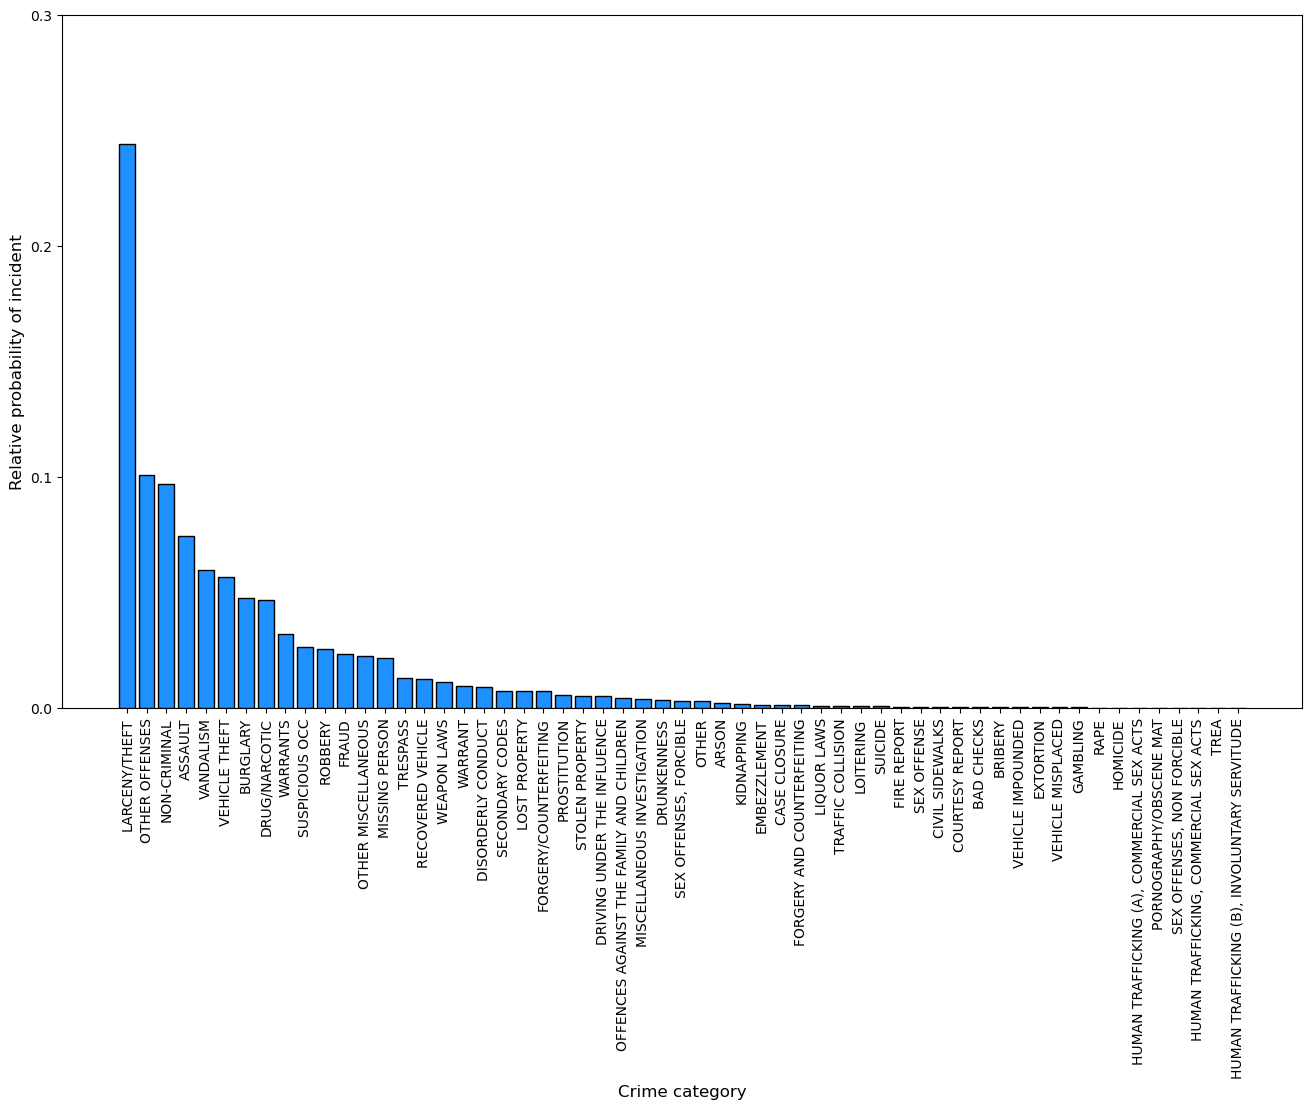

In [173]:
# Calculate normalized values (v)
# v = incident_per_category.values
# v_norm = (v - v.min()) / (v.max() - v.min())

y_upper_limit = (round(incident_per_category_norm.values.max(),1)+0.1)

fig, axs = fig, ax = plt.subplots(figsize=(16, 9))

axs.bar(incident_per_category_norm.index, incident_per_category_norm.values, color="dodgerblue", edgecolor='black')
axs.tick_params(axis='x', which='both', labelrotation=90)
axs.set_yticks(np.arange(0, y_upper_limit, 0.1))
axs.set_ylabel('Relative probability of incident', fontsize = 12)
axs.set_xlabel('Crime category', fontsize = 12)

plt.savefig(os.path.join(plots_path, "W2_ex5_P_crime_all.pdf"), format="pdf", bbox_inches="tight")
plt.show()

In [174]:
df_clean_focus = df_clean[df_clean['Category'].isin(focuscrimes)]
df_clean_focus.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month,MonthName,Year,Date
0,VANDALISM,NORTHERN,-122.428505,37.779534,Thursday,0,1,1,January,2004,2004-01-01
1,VANDALISM,RICHMOND,-122.462415,37.783951,Thursday,0,1,1,January,2004,2004-01-01
2,LARCENY/THEFT,BAYVIEW,-122.402541,37.728700,Thursday,0,1,1,January,2004,2004-01-01
6,LARCENY/THEFT,CENTRAL,-122.395330,37.796665,Thursday,0,1,1,January,2004,2004-01-01
7,ASSAULT,INGLESIDE,-122.417145,37.712150,Thursday,0,1,1,January,2004,2004-01-01


In [175]:
incident_per_category_focus = df_clean_focus["Category"].value_counts().sort_index().sort_values(ascending=False)
display(incident_per_category_focus)

# Temporary dataframe for normalization
df_temp = incident_per_category_focus

# Normalize the data for all columns
incident_per_category_focus_norm = df_temp.div(df_temp.sum(), axis=0)
display(incident_per_category_focus_norm)

Category
LARCENY/THEFT                  684276
ASSAULT                        208888
VANDALISM                      167227
VEHICLE THEFT                  159112
BURGLARY                       133687
DRUG/NARCOTIC                  130587
ROBBERY                         70731
TRESPASS                        36143
WEAPON LAWS                     30657
DISORDERLY CONDUCT              24981
PROSTITUTION                    15444
STOLEN PROPERTY                 14765
DRIVING UNDER THE INFLUENCE     13647
DRUNKENNESS                      9158
Name: count, dtype: int64

Category
LARCENY/THEFT                  0.402680
ASSAULT                        0.122926
VANDALISM                      0.098409
VEHICLE THEFT                  0.093634
BURGLARY                       0.078672
DRUG/NARCOTIC                  0.076847
ROBBERY                        0.041624
TRESPASS                       0.021269
WEAPON LAWS                    0.018041
DISORDERLY CONDUCT             0.014701
PROSTITUTION                   0.009088
STOLEN PROPERTY                0.008689
DRIVING UNDER THE INFLUENCE    0.008031
DRUNKENNESS                    0.005389
Name: count, dtype: float64

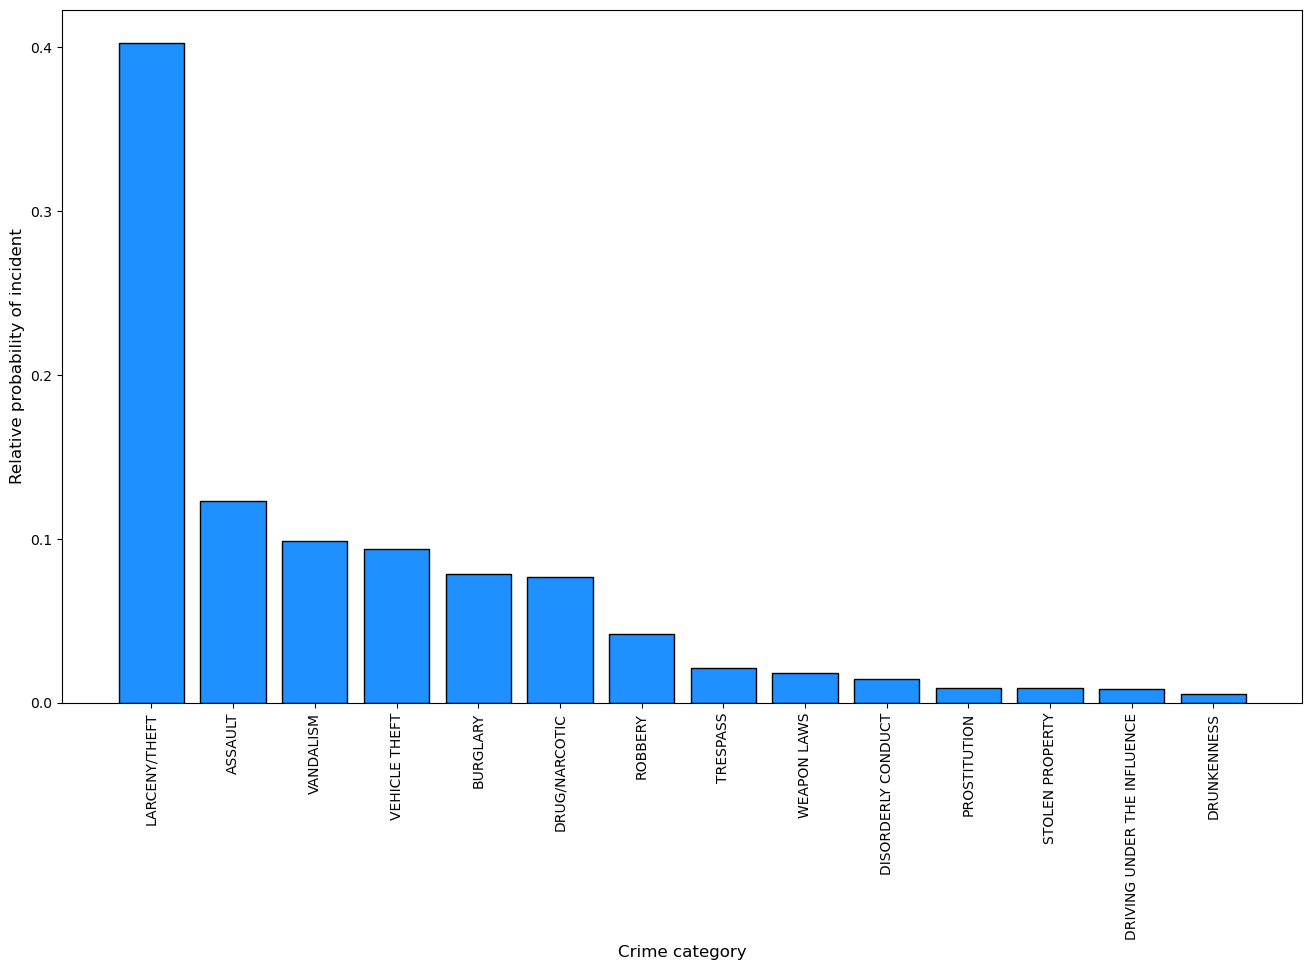

In [176]:
# Calculate normalized values (v)
# v = incident_per_category_focus.values
# v_norm = (v - v.min()) / (v.max() - v.min())

y_upper_limit = (round(incident_per_category_focus_norm.values.max(),1)+0.1)

fig, axs = fig, ax = plt.subplots(figsize=(16, 9))

axs.bar(incident_per_category_focus_norm.index, incident_per_category_focus_norm.values, color="dodgerblue", edgecolor='black')
axs.tick_params(axis='x', which='both', labelrotation=90)
axs.set_yticks(np.arange(0, y_upper_limit, 0.1))
axs.set_ylabel('Relative probability of incident', fontsize = 12)
axs.set_xlabel('Crime category', fontsize = 12)

plt.savefig(os.path.join(plots_path, "W2_ex5_P_crime.pdf"), format="pdf", bbox_inches="tight")
plt.show()

2. Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.

In [177]:
# Display the dataframe for reference
pd_cat_groupings_focus_t = pd_cat_groupings_focus.transpose().sort_index()
display(pd_cat_groupings_focus_t)

# Temporary dataframe for normalization
df_temp = pd_cat_groupings_focus_t

# Normalize the data for all columns
pd_cat_groupings_focus_t_norm = df_temp.div(df_temp.sum(axis=1), axis=0)
pd_cat_groupings_focus_t_norm

Category,ASSAULT,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
Police District,,,,,,,,,,,,,,
BAYVIEW,24546.0,12759.0,2276.0,1133.0,9410.0,532.0,40035.0,134.0,7922.0,1308.0,3568.0,19011.0,22972.0,5800.0
CENTRAL,21001.0,17051.0,2642.0,1195.0,4916.0,1110.0,118362.0,1895.0,7685.0,1993.0,4699.0,21095.0,12516.0,2234.0
INGLESIDE,19681.0,12158.0,1594.0,1237.0,5189.0,415.0,39456.0,84.0,7775.0,997.0,2312.0,17433.0,25293.0,3625.0
MISSION,32586.0,14930.0,4756.0,2743.0,19548.0,1742.0,70078.0,7166.0,11408.0,1979.0,4858.0,20767.0,21617.0,5062.0
NORTHERN,23347.0,21565.0,3045.0,1298.0,11275.0,756.0,121054.0,3378.0,8251.0,2304.0,3941.0,22232.0,18223.0,2727.0
PARK,8397.0,9730.0,1053.0,769.0,5783.0,711.0,35261.0,20.0,2426.0,584.0,1577.0,9010.0,10722.0,1005.0
RICHMOND,7921.0,9617.0,932.0,1141.0,2247.0,330.0,46654.0,52.0,2465.0,653.0,1876.0,10791.0,11401.0,895.0
SOUTHERN,33585.0,18024.0,3326.0,1779.0,21761.0,2018.0,130136.0,720.0,11030.0,2928.0,5698.0,23893.0,14917.0,4030.0
TARAVAL,12763.0,12441.0,1452.0,974.0,3272.0,638.0,47797.0,454.0,4036.0,752.0,2665.0,15351.0,17168.0,1668.0


Category,ASSAULT,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
Police District,,,,,,,,,,,,,,
BAYVIEW,0.162120,0.084270,0.015032,0.007483,0.062151,0.003514,0.264421,0.000885,0.052323,0.008639,0.023566,0.125563,0.151725,0.038308
CENTRAL,0.096161,0.078074,0.012097,0.005472,0.022510,0.005083,0.541965,0.008677,0.035189,0.009126,0.021516,0.096591,0.057309,0.010229
INGLESIDE,0.143396,0.088584,0.011614,0.009013,0.037807,0.003024,0.287478,0.000612,0.056649,0.007264,0.016845,0.127017,0.184285,0.026412
MISSION,0.148632,0.068099,0.021693,0.012511,0.089163,0.007946,0.319641,0.032686,0.052034,0.009027,0.022158,0.094723,0.098600,0.023089
NORTHERN,0.095922,0.088600,0.012510,0.005333,0.046324,0.003106,0.497354,0.013879,0.033899,0.009466,0.016192,0.091341,0.074870,0.011204
PARK,0.096464,0.111777,0.012097,0.008834,0.066435,0.008168,0.405075,0.000230,0.027870,0.006709,0.018116,0.103506,0.123173,0.011545
RICHMOND,0.081681,0.099170,0.009611,0.011766,0.023171,0.003403,0.481093,0.000536,0.025419,0.006734,0.019345,0.111276,0.117566,0.009229
SOUTHERN,0.122642,0.065818,0.012146,0.006496,0.079465,0.007369,0.475218,0.002629,0.040278,0.010692,0.020807,0.087250,0.054472,0.014716
TARAVAL,0.105105,0.102453,0.011957,0.008021,0.026945,0.005254,0.393614,0.003739,0.033237,0.006193,0.021947,0.126417,0.141381,0.013736


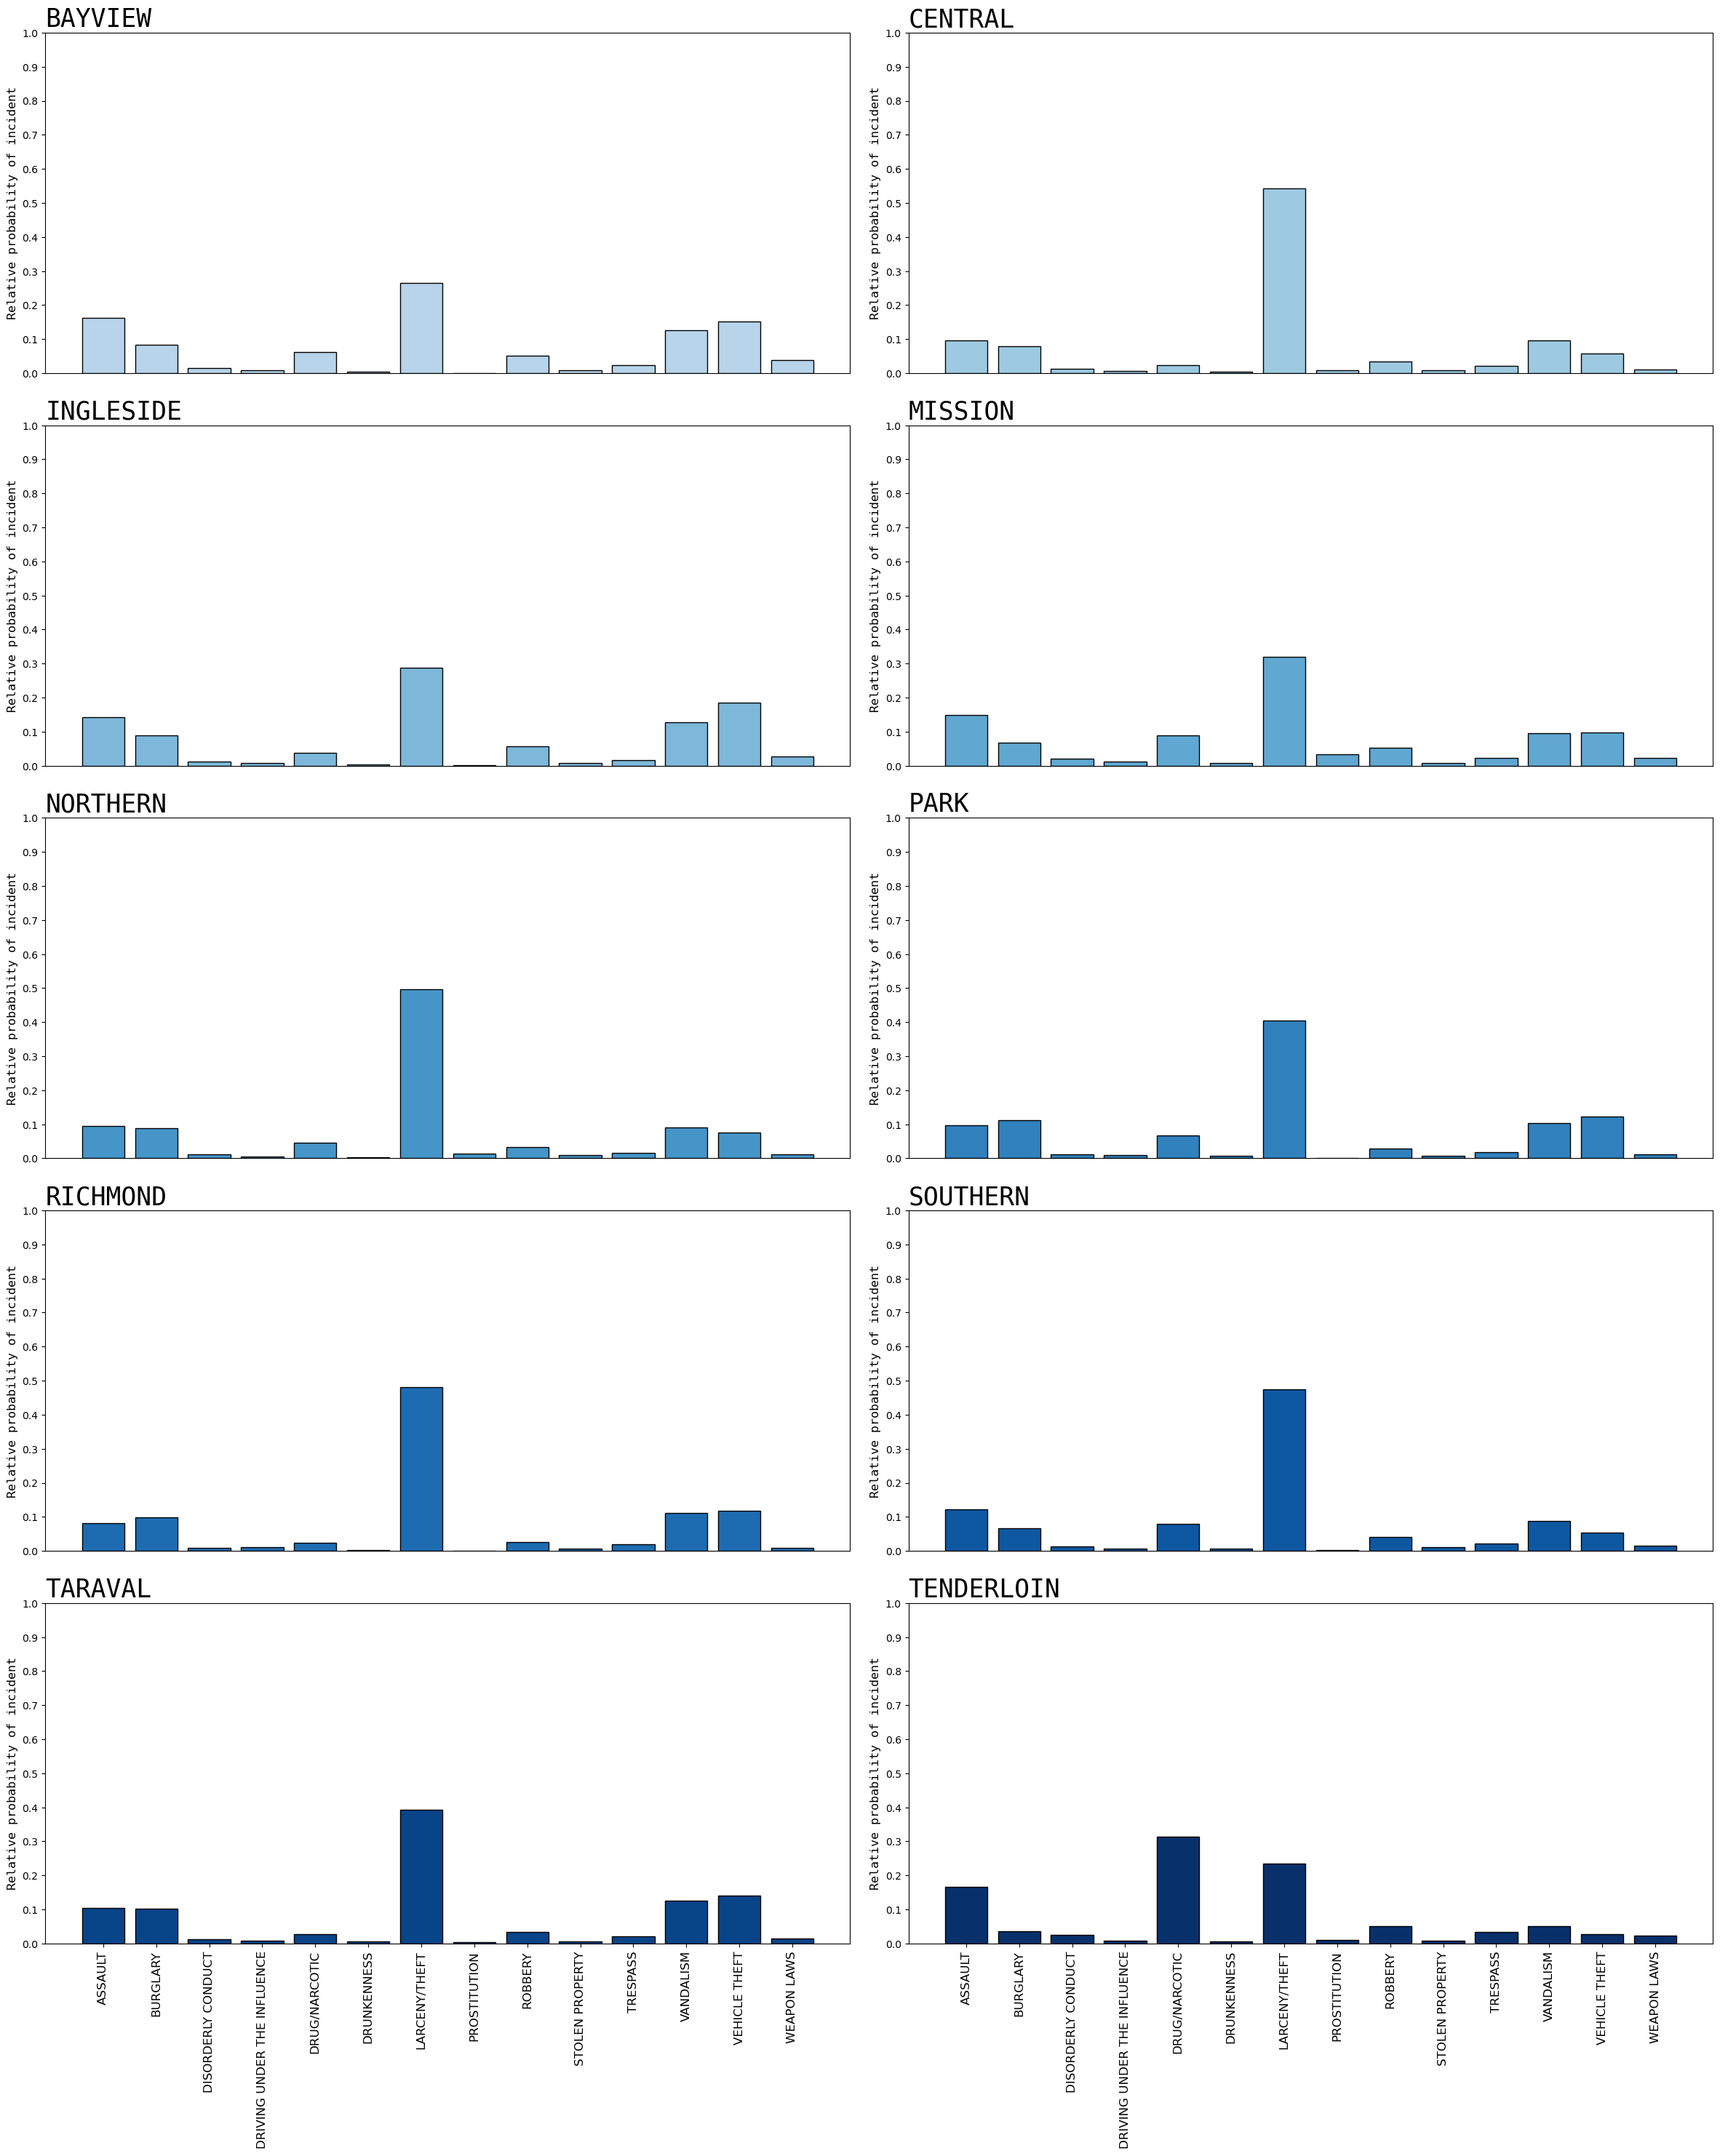

In [178]:
# Create a grid of subplots based on number of focus crimes

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 12
label_fontsize = 12

# Colors shades
colors = plt.cm.Blues(np.linspace(0.3, 1, len(pd_cat_groupings_focus_t_norm.index)))

# Dimensions of the grid
no_cols = 2
no_rows = int(len(pd_cat_groupings_focus_t_norm.index)/no_cols)
col_size = 12
row_size = 6

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        col_size*no_cols,  # Hardcoded width of 8 inches per column 
        row_size*no_rows   # Hardcoded height of 4 inches per row
    ), 
    sharex=False
)

# Flatten for easier indexing
axs = axs.flatten()

# Find the maximum value for the y-axis
max_val = pd_cat_groupings_focus_t_norm.max().max()

# PLOTTING THE DATA
for i, (category, count) in enumerate(pd_cat_groupings_focus_t_norm.iterrows()):
    
    # axs[i].bar(pd_cat_groupings_focus.index, v_norm, color="orangered", edgecolor='black')
    axs[i].bar(pd_cat_groupings_focus.index, count, color=colors[i], edgecolor='black')
    
    axs[i].set_title(category, loc='left', fontsize = subtitle_fontsize, fontfamily='monospace')
    axs[i].set_ylabel('Relative probability of incident', fontsize = label_fontsize, fontfamily='monospace')
    
    # Check if given subplot is in the bottom row, if not remove x-ticks
    if i >= (no_rows - 1) * no_cols:  
        axs[i].tick_params(axis='x', which='both', labelrotation=90, labelsize=tick_fontsize)
    else:
        axs[i].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    
    axs[i].set_yticks(np.arange(0, 1.1, 0.1))

fig.tight_layout(pad = 2.0)
plt.savefig(os.path.join(plots_path, "W2_ex5_P_crime_district.pdf"), format="pdf", bbox_inches="tight")
plt.show()

3. Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.

In [179]:
P_crime = pd.DataFrame(incident_per_category_focus_norm).sort_values(by="Category", ascending=True)
P_crime_district = pd_cat_groupings_focus_t_norm

display(P_crime)
display(P_crime_district)

,count
Category,
ASSAULT,0.122926
BURGLARY,0.078672
DISORDERLY CONDUCT,0.014701
DRIVING UNDER THE INFLUENCE,0.008031
DRUG/NARCOTIC,0.076847
DRUNKENNESS,0.005389
LARCENY/THEFT,0.402680
PROSTITUTION,0.009088
ROBBERY,0.041624


Category,ASSAULT,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
Police District,,,,,,,,,,,,,,
BAYVIEW,0.162120,0.084270,0.015032,0.007483,0.062151,0.003514,0.264421,0.000885,0.052323,0.008639,0.023566,0.125563,0.151725,0.038308
CENTRAL,0.096161,0.078074,0.012097,0.005472,0.022510,0.005083,0.541965,0.008677,0.035189,0.009126,0.021516,0.096591,0.057309,0.010229
INGLESIDE,0.143396,0.088584,0.011614,0.009013,0.037807,0.003024,0.287478,0.000612,0.056649,0.007264,0.016845,0.127017,0.184285,0.026412
MISSION,0.148632,0.068099,0.021693,0.012511,0.089163,0.007946,0.319641,0.032686,0.052034,0.009027,0.022158,0.094723,0.098600,0.023089
NORTHERN,0.095922,0.088600,0.012510,0.005333,0.046324,0.003106,0.497354,0.013879,0.033899,0.009466,0.016192,0.091341,0.074870,0.011204
PARK,0.096464,0.111777,0.012097,0.008834,0.066435,0.008168,0.405075,0.000230,0.027870,0.006709,0.018116,0.103506,0.123173,0.011545
RICHMOND,0.081681,0.099170,0.009611,0.011766,0.023171,0.003403,0.481093,0.000536,0.025419,0.006734,0.019345,0.111276,0.117566,0.009229
SOUTHERN,0.122642,0.065818,0.012146,0.006496,0.079465,0.007369,0.475218,0.002629,0.040278,0.010692,0.020807,0.087250,0.054472,0.014716
TARAVAL,0.105105,0.102453,0.011957,0.008021,0.026945,0.005254,0.393614,0.003739,0.033237,0.006193,0.021947,0.126417,0.141381,0.013736


In [180]:
# Divide each row in df2 by the corresponding value in df1
P_crime_district_P_crime = P_crime_district.div(P_crime['count'], axis=1)

# Display the result
display(P_crime_district_P_crime)

Category,ASSAULT,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
Police District,,,,,,,,,,,,,,
BAYVIEW,1.318849,1.071162,1.022563,0.931795,0.808756,0.651987,0.656653,0.097381,1.257051,0.994265,1.107971,1.275928,1.620405,2.123372
CENTRAL,0.782270,0.992409,0.822911,0.681335,0.292915,0.943089,1.345895,0.954728,0.845404,1.050277,1.011606,0.981529,0.612058,0.567001
INGLESIDE,1.166528,1.125990,0.790024,1.122262,0.491978,0.561060,0.713910,0.067341,1.360982,0.836033,0.792000,1.290706,1.968154,1.463996
MISSION,1.209118,0.865609,1.475649,1.557900,1.160255,1.474343,0.793782,3.596400,1.250117,1.038875,1.041800,0.962539,1.053037,1.279804
NORTHERN,0.780324,1.126206,0.851010,0.664041,0.602801,0.576340,1.235109,1.527064,0.814431,1.089448,0.761272,0.928174,0.799603,0.621030
PARK,0.784734,1.420809,0.822869,1.100022,0.864501,1.515587,1.005948,0.025280,0.669565,0.772132,0.851764,1.051793,1.315482,0.639954
RICHMOND,0.664473,1.260554,0.653758,1.465074,0.301519,0.631429,1.194727,0.059000,0.610686,0.774980,0.909536,1.130749,1.255599,0.511569
SOUTHERN,0.997695,0.836620,0.826187,0.808918,1.034058,1.367372,1.180136,0.289294,0.967680,1.230562,0.978282,0.886605,0.581761,0.815721
TARAVAL,0.855028,1.302289,0.813389,0.998764,0.350634,0.974903,0.977486,0.411374,0.798514,0.712731,1.031845,1.284611,1.509934,0.761391


4. For each district plot these ratios for the 14 focus crimes. 

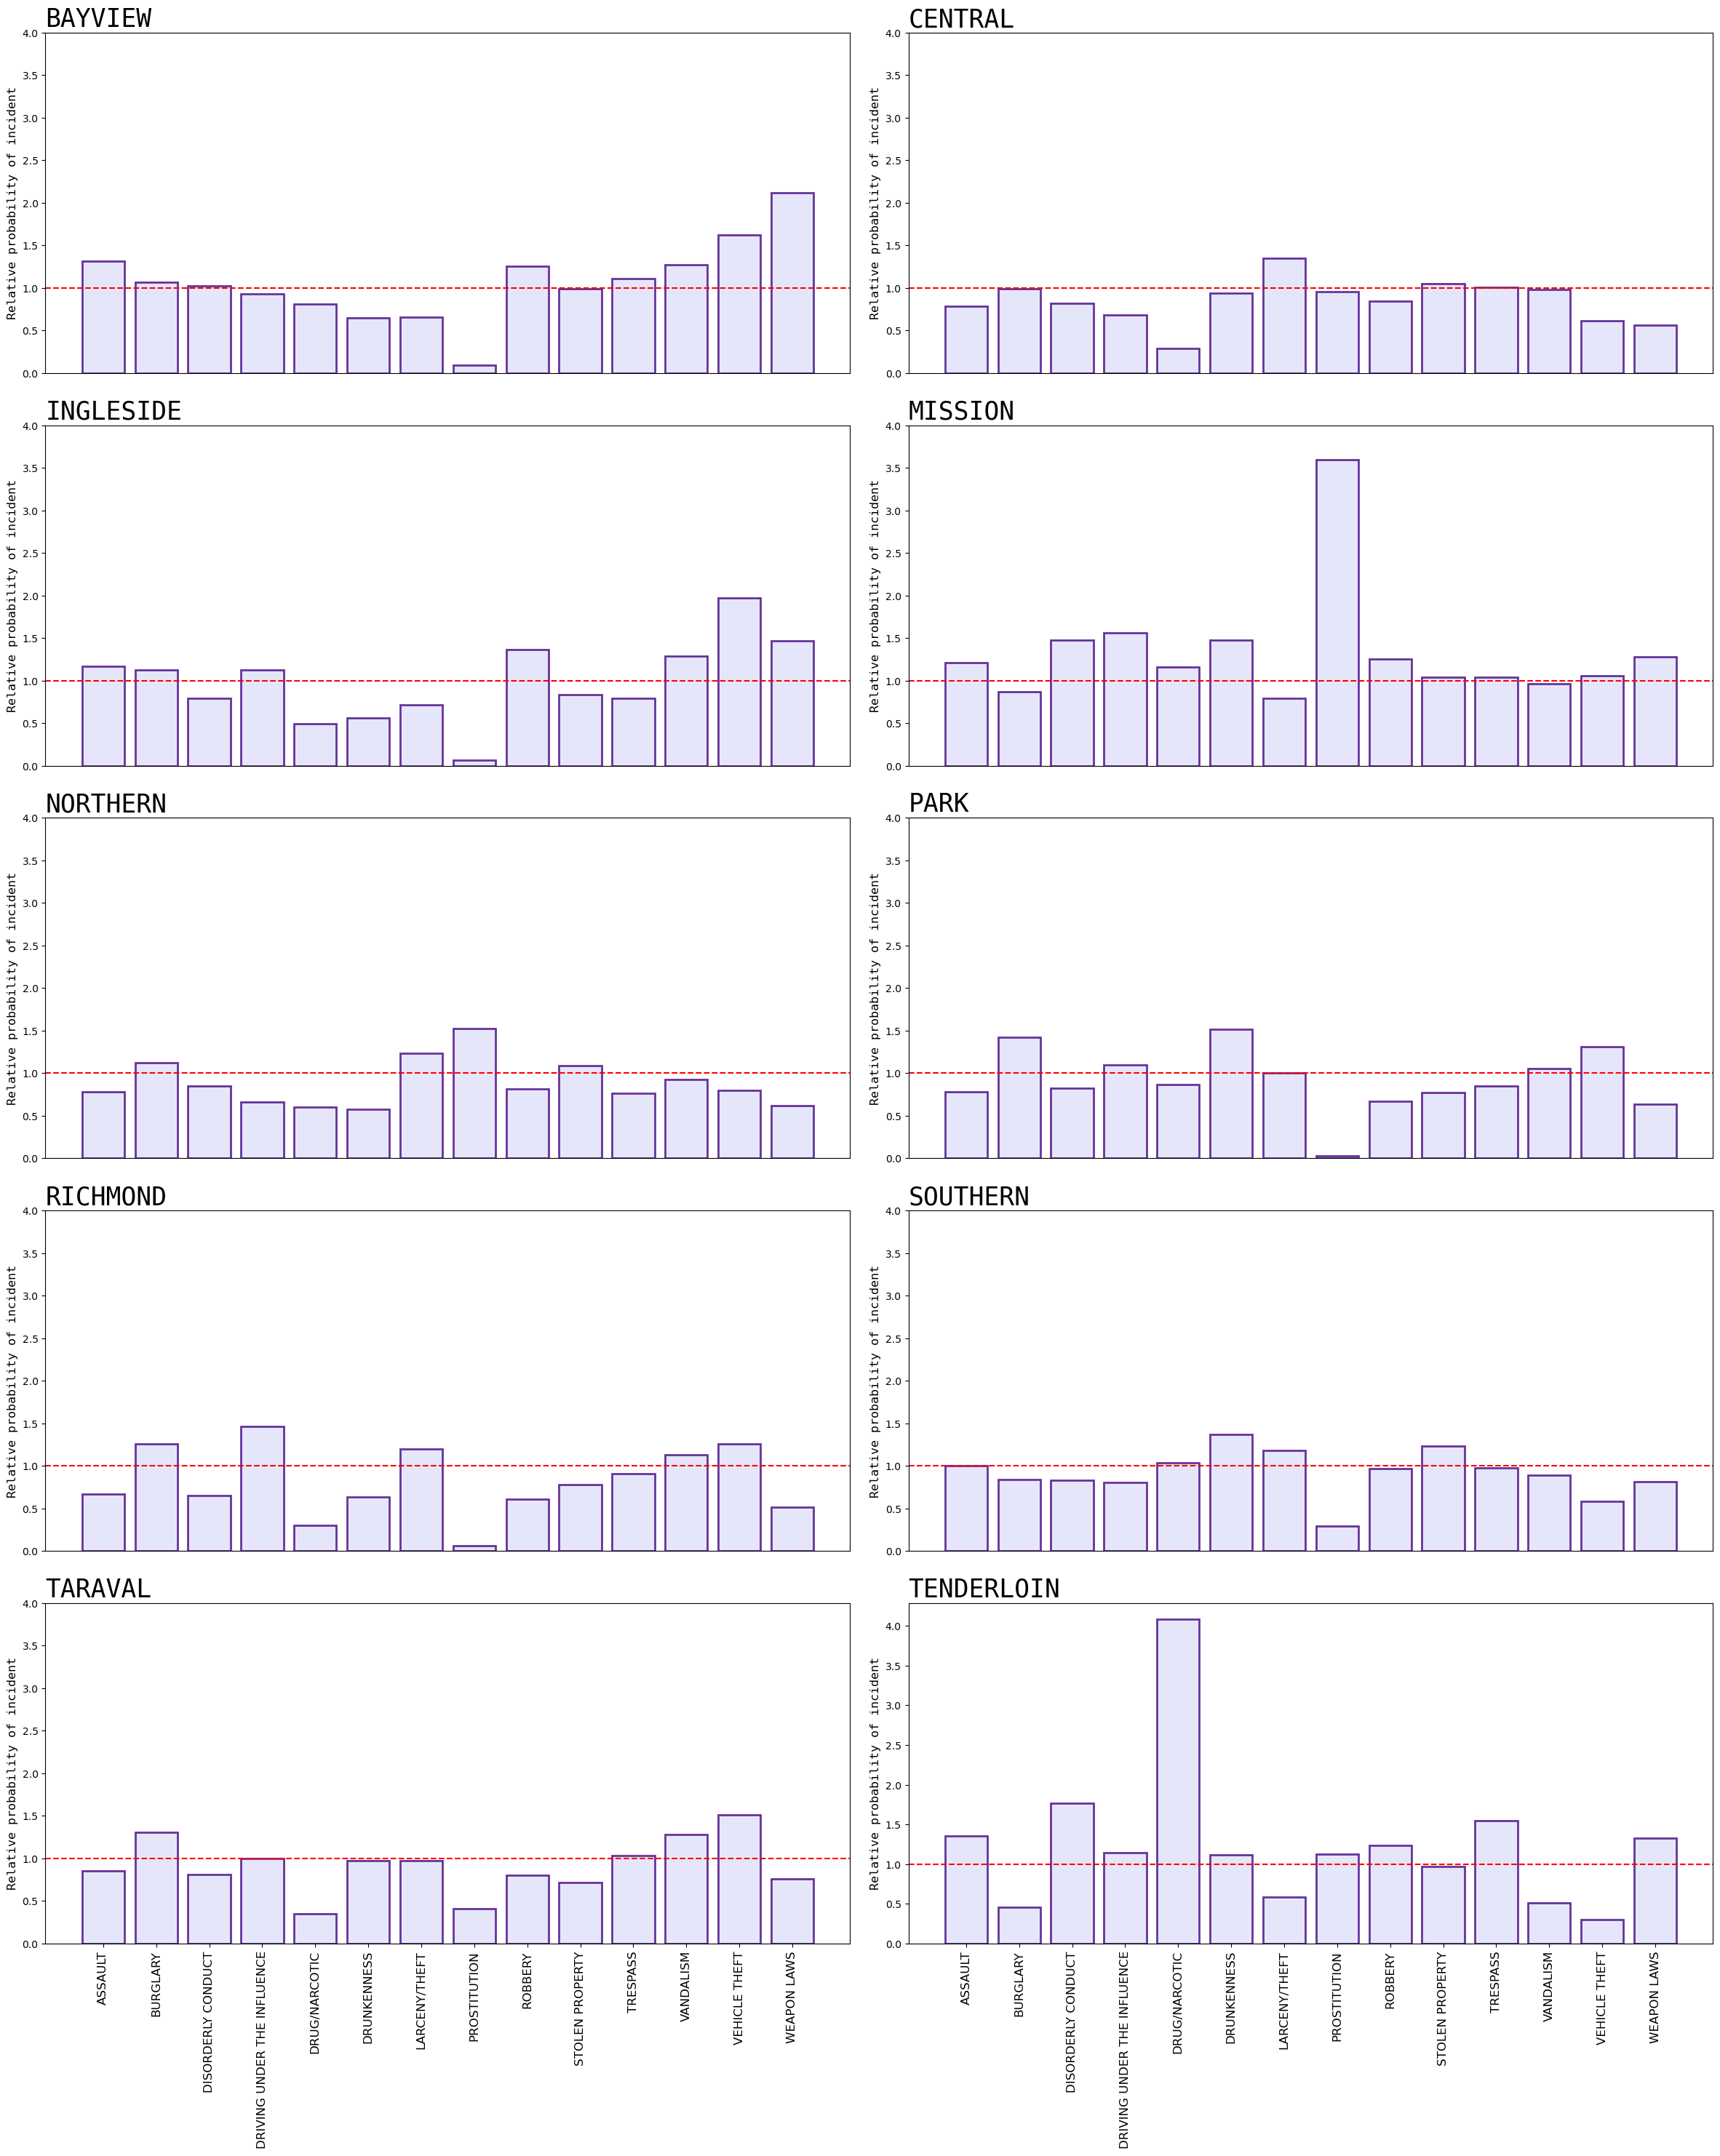

In [181]:
# Create a grid of subplots based on number of focus crimes

y_upper_limit = (round(P_crime_district_P_crime.values.max(),1)+0.1)

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 12
label_fontsize = 12

# Colors shades
colors = plt.cm.Purples(np.linspace(0.3, 1, len(P_crime_district_P_crime.index)))

# Dimensions of the grid
no_cols = 2
no_rows = int(len(P_crime_district_P_crime.index)/no_cols)
col_size = 12
row_size = 6

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        col_size*no_cols,
        row_size*no_rows  
    ), 
    sharex=False
)

# Flatten for easier indexing
axs = axs.flatten()

# Find the maximum value for the y-axis
max_val = P_crime_district_P_crime.max().max()

# PLOTTING THE DATA
for i, (category, count) in enumerate(P_crime_district_P_crime.iterrows()):
    
    # Plot the bar for the given Police District
    axs[i].bar(pd_cat_groupings_focus.index, count, color="lavender", edgecolor='rebeccapurple', linewidth=2)
    
    # Add a horizontal line at y = 1.0 to represent the average relative probability
    axs[i].axhline(y = 1.0, color = 'red', linestyle = 'dashed', label = "red line")

    # Add title, labels and ticks
    axs[i].set_title(category, loc='left', fontsize = subtitle_fontsize, fontfamily='monospace')
    axs[i].set_ylabel('Relative probability of incident', fontsize = label_fontsize, fontfamily='monospace')     
    # axs[i].tick_params(axis='x', which='both', labelrotation=90, labelsize = tick_fontsize)
    
    # Check if given subplot is in the bottom row, if not remove x-ticks
    if i >= (no_rows - 1) * no_cols:  
        axs[i].tick_params(axis='x', which='both', labelrotation=90, labelsize=tick_fontsize)
    else:
        axs[i].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    axs[i].set_yticks(np.arange(0.0, y_upper_limit, 0.5))
    
fig.tight_layout(pad = 2.0)
plt.savefig(os.path.join(plots_path, "W2_ex5_P_crime_district_P_crime.pdf"), format="pdf", bbox_inches="tight")
plt.show()

>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia <font color="grey">(or from your LLM's description of those neighborhoods)</font>?

>    - What neighborhood would you prefer to live in? Explain why?

>    - <font color="grey">BONUS QUESTION. Can you get your LLM to discuss the graphic you created? (E.g. by showing it the image) Did it notice anything you didn't?</font>

In [182]:
# Maybe not worth spending time on this?